# Tanzania-Water-Wells-Project

#### Author: Karanja Gakio

   #             Project Overview

This project aims to significantly improve access to clean water in Tanzania an East African country with a population of 63.59 million, where only 50% currently have access to basic water supply. Partnering with the Tanzania National Bureau of Statistics and utilizing advanced technology, Stakeholders UN-Habitat, NGO, Danida, seeks to identify, prioritize, and repair or replace non-functional or deteriorating water wells. By deploying a  classification model incorporating various data points, including installation history and local demographics, I intend to accurately pinpoint wells needing attention. My objective is to enhance the efficiency and effectiveness of water infrastructure interventions, ensuring a sustainable supply of clean water and alleviating the health and socio-economic burdens faced by vulnerable populations, including women and children, caused by inadequate water supply and sanitation. Through these efforts, i aim to significantly enhance the overall well-being of Tanzanian communities and contribute to long-term public health and development in the region.

# Business Problem

The UN-Habitat, in collaboration with leading funders in Tanzania, seeks to address the pressing issue of inadequate clean water supply in Tanzanian communities. Despite Tanzania's government efforts to expand access to clean water, the country still faces a staggering annual toll of 31,000 deaths due to inadequate water and sanitation services, with over 10% of these deaths being preventable. The initiative aims to tackle this problem by focusing on the distribution and functionality of wells and water pumps across Tanzania. Many water pumps, while existing, require maintenance, and others are completely non-functional. As a data scientist, my task is to identify patterns in the data that can predict water pump functionality. By uncovering these patterns, our goal is to provide actionable insights to stakeholders, enabling them to accurately predict which water pumps need immediate maintenance and which water points require urgent resource allocation due to their non-functional status. This predictive analysis will empower stakeholders to make informed decisions and optimize their efforts in ensuring sustainable access to clean water for Tanzanian communities.

OBJECTIVES

To identify the patterns in functional and non-functional wells.

To predict the functionality of water pumps based on the features provided.

To ascertain features that greatly affect water pump functionality

## Data Source

There are 4 different data sets; submission format, training set, test set and train labels set which contains status of wells. With given training set and labels set. The  requirement is to build predictive model and apply it to test set to determine status of the wells and submit.

In this project, i will use train set and train label set. Train set has 59400 water points data with 40 features. Train labels data has 59400 same water points with train set but just has information about id of these points and status of them.

# Data Understanding

Loading Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


Loading Datasets

In [2]:
Df1 = pd.read_csv('training_set_labels (1).csv') # Model Target_Variable

Df2 = pd.read_csv('training_set_values.csv')  # Model Input_Data

df_key = pd.read_csv('key.csv')  # DataSet Features & Descriptions

test_df = pd.read_csv('test_set_values (1).csv') # Model Test_Data


Merging Df1 and Df2 so as to have a complete Dataframe Overview of both Target and Input features

In [3]:
df = Df1.merge(Df2,on="id")

# Dataset Overview
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
# statistical analysis of the dataset 

df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000



Understanding dataframe (df_key) columns and their descriptions

In [5]:
# Viewing the dataframe (df_key) for column understanding 
df_key

,Key,Description
0,amount_tsh,Total static head (amount water available to w...
1,date_recorded,The date the row was entered
2,funder,Who funded the well
3,gps_height,Altitude of the well
4,installer,Organization that installed the well
5,longitude,GPS coordinate
6,latitude,GPS coordinate
7,wpt_name,Name of the waterpoint if there is one
8,basin,Geographic water basin
9,subvillage,Geographic location


The columns  are well elaborated there seems to be similarities in column description which i will delve deeper to understand.  
["num_private"] column is missing because there is no information provided about it and ['id'] column was ommited because its just a row unique identifier not necessary for any analysis  

In [6]:
# previewing the shape and information of our dataframe
def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")

    print('_________________________________________________________________________________________________')
    print('_________________________________________________________________________________________________')

    print('Numerical Columns:', data.select_dtypes(include='number').columns)
    print('_________________________________________________________________________________________________')
    print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

data_types(df)


Our dataset has 10 numeric columns
and 31 categorical columns
_________________________________________________________________________________________________
_________________________________________________________________________________________________
Numerical Columns: Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')
_________________________________________________________________________________________________
Categorical Coulumns: Index(['status_group', 'date_recorded', 'funder', 'installer', 'wpt_name',
       'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quan

The dataset has 41 columns as expected, 10 numerical columns and 31 categorical columns.The many categorical features are very encouraging for both Exploratory data analysis and Modeling

# Data Cleaning

Plotting DataFrame pie_chart for MissingValues Bar plot for the columns with Null values and a Dictionary for missing values_count

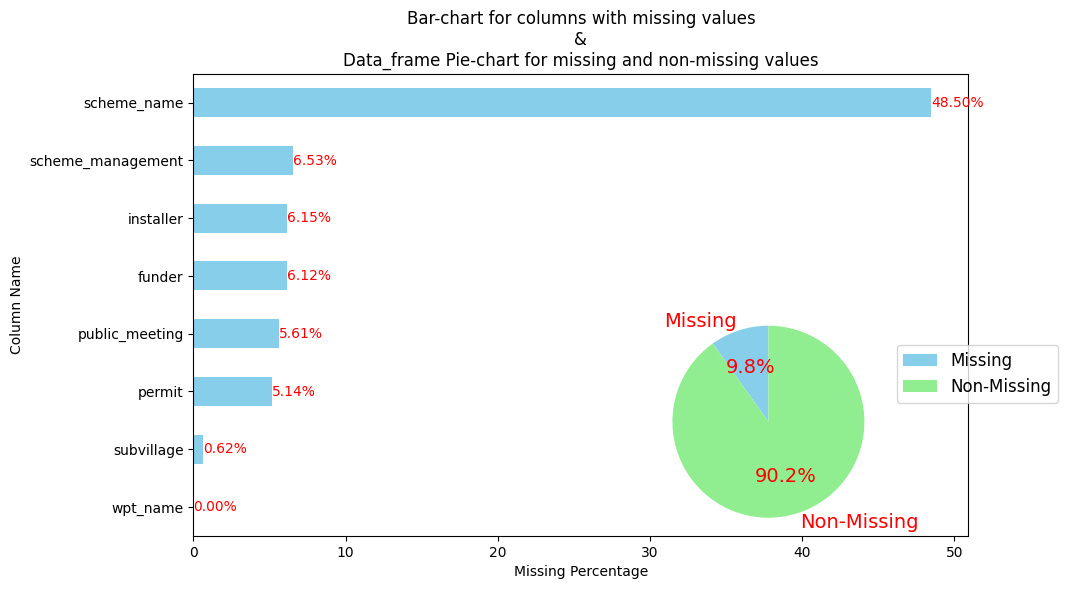

DataFrame missing value counts Dictionary:
{'id': 0, 'status_group': 0, 'amount_tsh': 0, 'date_recorded': 0, 'funder': 3637, 'gps_height': 0, 'installer': 3655, 'longitude': 0, 'latitude': 0, 'wpt_name': 2, 'num_private': 0, 'basin': 0, 'subvillage': 371, 'region': 0, 'region_code': 0, 'district_code': 0, 'lga': 0, 'ward': 0, 'population': 0, 'public_meeting': 3334, 'recorded_by': 0, 'scheme_management': 3878, 'scheme_name': 28810, 'permit': 3056, 'construction_year': 0, 'extraction_type': 0, 'extraction_type_group': 0, 'extraction_type_class': 0, 'management': 0, 'management_group': 0, 'payment': 0, 'payment_type': 0, 'water_quality': 0, 'quality_group': 0, 'quantity': 0, 'quantity_group': 0, 'source': 0, 'source_type': 0, 'source_class': 0, 'waterpoint_type': 0, 'waterpoint_type_group': 0}


In [7]:
# Calculate missing percentage for each column
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=True)
missing_percentage = missing_percentage[missing_percentage > 0]
non_missing_percentage = 100 - missing_percentage
# Plot horizontal bar chart for missing data percentages
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='barh', color='skyblue')
plt.xlabel('Missing Percentage')
plt.ylabel('Column Name')
plt.title('Bar-chart for columns with missing values\n&\nData_frame Pie-chart for missing and non-missing values')
plt.xticks(rotation=0)

# Add missing percentage values on the bars
for index, value in enumerate(missing_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', color='red')

# Add pie chart in the bottom right corner
ax_pie = plt.axes([0.5, 0.1, 0.4, 0.4])  # [left, bottom, width, height]
ax_pie.pie([missing_percentage.sum(), non_missing_percentage.sum()], labels=['Missing', 'Non-Missing'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'], textprops={'color': 'red', 'size': 14})

# Adding legends for missing and non-missing values
ax_pie.legend(['Missing', 'Non-Missing'], loc='center left', bbox_to_anchor=(1, 0.7), fontsize=12)

plt.show()

# Print missing value counts for each column
null_counts = df.isnull().sum()
print("DataFrame missing value counts Dictionary:")
print(null_counts.to_dict())


The DataFrame has 8 columns with missing values whose values are less than 10% of the whole dataframe however ['Scheme_name'] column that has 48.5% null values will be droped for such a high number of missing values it also has similar description as "scheme_management".The ["id" ,"num_private "] columns will also be droped on the context that they lack relevance on solving our business problem .Before imputatiuon or droping other columns i will delve into them further so as to understand the nature of their missing values 

# DUPLICATED_VALUES

In [8]:
#Checking for duplicates 
df.duplicated().any()

False

  #             -DATAFRAME COLUMN EXPLORATION-

#### Getting columns with zero values. This is just a BE-AWARE code to avoid ZERO value Misinterpretation & problems during imputations

In [9]:
columns_with_zeros = df.eq(0).any()

# Filter columns where 0 values
columns_with_zeros = columns_with_zeros[columns_with_zeros].index.tolist()
print(columns_with_zeros)

['id', 'amount_tsh', 'gps_height', 'longitude', 'num_private', 'district_code', 'population', 'public_meeting', 'permit', 'construction_year']


####  the  function below takes a list of columns  and returns all their value-counts as well as any identified special characters 

In [10]:
import re

class ColumnValueCounts:
    def __init__(self, df, columns):
        self.df = df
        self.columns = columns
    
    def get_value_counts(self):
        value_counts = {}
        total_elements = {}
        for column in self.columns:
            # Getting the total number of elements in the column
            total_elements[column] = len(self.df[column])
            # Getting the unique value counts in the column
            value_counts[column] = self.df[column].value_counts()
        
        return total_elements, value_counts

def uniq_Dtypes(df, columns):
    # a regular expression pattern for special characters
    special_characters_pattern = r'[!@#$%^&*(),?":{}|<>]'
    
    special_characters_found = {}
    
    for column_name in columns:
        # Extracting values in the specified column as strings
        column_values = df[column_name].astype(str)
        
        # Finding all special characters in the column
        special_characters = set()
        for value in column_values:
            matches = re.findall(special_characters_pattern, value)
            special_characters.update(matches)
        
        special_characters_found[column_name] = special_characters
    
    return special_characters_found


## _Exploring latitude & Longitude columns

 _latitude & longitude values are crucial when mapping water_points 
 _Tanzania though an East Afican Country doesn't have either the Equator or the Prime_Meridian so lets look-into the ZERO values identified above in the [longitude] column

In [11]:
# previewing the 0 values in the dataset

df[df['longitude'] == 0].head(3)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
21,6091,functional,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,...,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
53,32376,non functional,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
168,72678,functional,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,...,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


The rows with longitude 0 degrees have functional and non functional Water points which are vital in solving our Business problem,they might have missed or lost the exact figures and choose to fill it with 0,since its just 3% of the data i will fill it with the column Mean

In [12]:
# replacing 0 values with column mean
longitude = df[df['longitude'] != 0]['longitude'].mean()

df['longitude'] = df['longitude'].replace(0, longitude)

#confirming the result 
print(' There is a total longitude value of ',(df['longitude'] == 0).sum(),'values')

 There is a total longitude value of  0 values


## a list of  columns with repetitive information 

In [13]:
# selecting repetitive columns
tedious_columns = [8,9,10,11,12,13,14, 18, 19] + list(range(22, 38))

# Select rows based on specific indices
selected_columns = df_key.iloc[tedious_columns]
selected_columns = selected_columns['Key'].to_list()
selected_columns


['basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'scheme_management',
 'scheme_name',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

# Exploring selected columns

In [14]:
columns = selected_columns  #inserting a list of columns

data_values = ColumnValueCounts(df, columns)
total_elements, value_counts = data_values.get_value_counts()

# Printing total elements and value counts for each column
for column in columns:
    print(f"Total elements in '{column}': {total_elements[column]}")
    print(value_counts[column])
    print("\n" + "="*50 + "\n")
    
# checking special characters
found = uniq_Dtypes(df, columns)

# Printing special characters found in each column
for column, special_characters in found.items():
    if special_characters:
        print(f"This special characters were in the column '{column}': {', '.join(special_characters)}")
    else:
        print(f"No special characters were in the column '{column}'.")


Total elements in 'basin': 59400
basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64


Total elements in 'subvillage': 59400
subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64


Total elements in 'region': 59400
region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           22

No special characters were in the column 'basin'.
This special characters were in the column 'subvillage': #, ), (
No special characters were in the column 'region'.
No special characters were in the column 'region_code'.
No special characters were in the column 'district_code'.
No special characters were in the column 'lga'.
No special characters were in the column 'ward'.
No special characters were in the column 'scheme_management'.
This special characters were in the column 'scheme_name': :, &, ), (
No special characters were in the column 'extraction_type'.
No special characters were in the column 'extraction_type_group'.
No special characters were in the column 'extraction_type_class'.
No special characters were in the column 'management'.
No special characters were in the column 'management_group'.
No special characters were in the column 'payment'.
No special characters were in the column 'payment_type'.
No special characters were in the column 'water_quality'.
No special charac

#### Below here is a description of how i delt with the selected columns previewed above.Order is similar to the Order in the result above 
     # Hint___Readability is easier in Markdown mode since column names are in brackets hence highlighted


##  ['basin','subvillage','region','region_code','district_code','lga','ward']

All the geographic columns above have related information i kept some and dropped others here is how:;

[basin] column is important for EDA comparison on whether water sourcing ,quality and availability has any relation with functionality of a water_point so i  kept it

[subvillage] column not only has special characters but also missing values .having district and region positioning of the water_point this column became irrelevant so i droped it. i also dropped the [iga]  column since it does not in any way help in solving the bussiness problem considering i have the [ward] column 

[region,region_code,district code] columns basically represent the same thing,knowing i have the latitude and longitude values necassary for geographical mapping  i dropped the region_code and district_code columns and kept the other 


## 'scheme_management','scheme_name'

Both columns above describes who operates the water point.However [scheme_name] column has 48.5% null values and [scheme_management] contains same information as [management] column and for those reasons both columns will be  droped 

##  'extraction_type', 'extraction_type_group', 'extraction_type_class'

Extraction columns are vital for  EDA comparison as well as Final recomendation knowing that, i picked [extraction_type_class] column since it encapsulates all the information from the other 2 columns which will be dropped later

##  management, management_group

Here the more detailed column is valuable for recomendation so i kept the [management] column which also has all the values in the [scheme_management]column .The [management_group] column is too summurised for precise EDA analysis required so i will drop it 

## payment,payment_type 

This two columns identically have the same information but the [payment_type] column wording is precise making it easier for analysis and visualization so i will it and drop the [payment]column

## water_quality, quality_group

Both columns carry same information on water quality but i will drop the [water_quality] column because of the extra information (salt_abandoned & flouride_abandoned) that doesn't add value to our analysis 

## quantity, quantity_group

This columns have same number of value_counts and same wording in their respective values i will drop [quantity-group]column simply because one has to go 

## source, source_type, source_class

There is a number of unknowns in the [source_class & source] columns comparing them to source type column, i will drop the two and remain with the  [source_type] column

## waterpoint_type, water_type_group

i decided to keep [water_type_group] since it has more detail 

# droping identified redundant columns 

In [15]:
# making a list of un-necessary Columns
columns_to_drop = ['subvillage','district_code','region_code','management_group','lga','payment','water_quality','source_class',
                   'source','quantity_group','waterpoint_type_group','extraction_type', 'extraction_type_group','scheme_management','scheme_name']
# droping the columns
df = df.drop(columns=columns_to_drop)

#  Dataframe shape after droping 
df.shape

(59400, 26)

# reviewing remaining columns

In [16]:
# getting a list of remaining columns for scrutiny
columns_list = df.columns.to_list()

# remaining DataFrame columns in a list
remaining = [value for value in columns_list if value not in selected_columns]
remaining

['id',
 'status_group',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'population',
 'public_meeting',
 'recorded_by',
 'permit',
 'construction_year']

## Exploration of the remaining columns

In [17]:
columns = remaining #inserting columns

data_values = ColumnValueCounts(df, columns)
total_elements, value_counts = data_values.get_value_counts()

# Printing total elements and value counts for each column
for column in columns:
    print(f"Total elements in '{column}': {total_elements[column]}")
    print(value_counts[column])
    print("\n" + "="*50 + "\n")

# checking special characters
found = uniq_Dtypes(df, columns)

# Printing special characters found in each column
for column, special_characters in found.items():
    if special_characters:
        print(f"This special characters were in the column '{column}': {', '.join(special_characters)}")
    else:
        print(f"No special characters were in the column '{column}'.")


Total elements in 'id': 59400
id
69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: count, Length: 59400, dtype: int64


Total elements in 'status_group': 59400
status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


Total elements in 'amount_tsh': 59400
amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64


Total elements in 'date_recorded': 59400
date_recorded
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: count, Length: 356, dtype: int64


Total elements in 'funder': 59400
funder
G

                       Elaboration of remaining columns

## ammount_tsh

The column [ammount_tsh] typically refers to the total static head (TSH) of the water source. The total static head is the total vertical distance between the water level in the source .It has zero values as identified above this could be  a waterpoint that is non-functional or broken might have a "amount_tsh" value of zero, indicating that it is not currently providing any water or its above sea level.This will be confirmed in the EDA analysis below 

## date_recorded 

since the Business problem entails functionality of a water point the [date_recorded] becomes irrelevant considering we have the waterpoint construction date .It will be droped below 

## funder 

While [funder] column is crucial for EDA analysis it  contains both null_values and special characters as seen above I will go ahead and clean it

In [18]:
# replacing zero and null_values with unknown

df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

# checking any zeros and null values 
df['funder'].isna().sum() == 0 and (df['funder'] != 'unknown').all() and (df['funder'] == 1).all()

False

since funding column is only necessary for EDA analysis i will only check special characters from this column in the highest       30 funding  instititions 

In [19]:
# checking any special characters in the top 30 funding institutions

top_20_values = df['funder'].value_counts().head(30)

top_20_values.index.str.contains(r'[!@#$%^&*,?":{}|<>]').any()


False

 False means no special characters so we are good to go 

## gps_height

The ['gps_height'] column  typically represents the altitude of the well or water source above sea level. The 0 values identified above  means the water source is at the same level as the surrounding terrain.In EDA analysis we will compare this with [population] to see the likely correlation of  higher population around low altitude areas

# installer 

[installer columnn] represents the organization, group, or individual responsible for installing the a water point..it contains both null values and special characters . i will go ahead and clean it

In [20]:
#the null values are at a low of just 6.15% i will replace them with unkown

df['installer'].fillna('unknown', inplace=True)

# confirmation of no missing values 
df['installer'].isna().sum() == 0

True

### The function below takes a DataFrame removes spelling mistakes, and categorizes the specified installer column 

In [21]:
class InstallerCleaner:
    def __init__(self, df):
        self.df = df
        self.replacements = {
            'Hesawa': 'HESAWA',
            'COUN': 'District council',
            'District council':'District Council',
            'RC CHURCH': 'RC Church',                              
            'Central Government': 'Central government',            
            'Commu': 'Community',
            'GOVERNMENT': 'TZ-Government',
            '0': 'unknown',
            'FinW': 'Fini Water',
            'Fini water': 'Fini Water',
            'FINI WATER': 'Fini Water'
        }
        self.top_n = 30

    def clean_and_categorize(self):
        # Apply specific replacements
        self.df['installer'] = self.df['installer'].replace(self.replacements)
        
        # Get top N installers based on value counts
        top_installers = self.df['installer'].value_counts().head(self.top_n).index
        
        # Categorize top installers as they are
        self.df.loc[self.df['installer'].isin(top_installers), 'installer'] = self.df['installer']
        
        # Categorize the rest as 'h', 'a', 't', 'u', 'w', 'j', 'u', 'i'
        other_installers = list(set(self.df['installer']) - set(top_installers))
        categorized_installers = ['h', 'a', 't', 'u', 'w', 'j', 'u', 'i']
        installer_mapping = dict(zip(other_installers, categorized_installers))
        
        self.df['installer'] = self.df['installer'].replace(installer_mapping)
        return self.df
cleaner = InstallerCleaner(df)
cleaned_df = cleaner.clean_and_categorize()


## wpt_name column 

[wpt_name] column contains the waterpoint names I will drop it since it doesn't affect the functionality of a water point

## population column

[population] column contains zero values as we had identified earlier NOW in the PROJECT data description it stated around 58% of the Tanzania population already has access to water so this is likely to explain the zero values in this column -- we will debunk this hypothesis in the EDA proeceeding below 

## public_meeting column 

[public_meeting] column has 3365 null values though few in comparison with dataset size , i will replace them with unkown for EDA purposes 

In [22]:
df['public_meeting'].fillna('Unknown', inplace=True)

# confirming a clean column 
df['public_meeting'].isna().any()

False

## recorded_by column

All the 59400 entries were collected  by Geo_data consultants LTD hence it will be dropped 

## permit column 

[permit] column has 3056 null values ,i will go ahead fill them with uknown so as to find a likely pattern later  

In [23]:
df['permit'].fillna('Unknown', inplace=True)

# confirming a clean column 
df['permit'].isna().any()

False

## construction_year column

[construction_year] column is crucial in solving  our busisness problem -- 

_i will replace the zero_values with NAN values then  impute the missing values with likely record year of the region

_i will then bin the dates into decades necessary for encoding in our model.Hence making a new column ['construction_decade']

In [24]:
# Replacing zero values with NaN
df['construction_year'] = df['construction_year'].replace(0, np.nan)

# Imputing missing values based on the entire dataset
median_construction_year = df['construction_year'].median()
df['construction_year'] = df['construction_year'].fillna(median_construction_year)

# Creating the construction_decade column based on construction_year
df['construction_decade'] = pd.cut(df['construction_year'], bins=[1959, 1969, 1979, 1989, 1999, 2009, 2019],
                                   labels=['1960', '1970', '1980', '1990', '2000', '2010'],
                                   include_lowest=True, right=False)

 # confirming [clean 'construction_year','construction_decade'] columns are clean
df[['construction_year','construction_decade']].isna().any()

construction_year      False
construction_decade    False
dtype: bool

## droping above identified columns

In [25]:
columns_to_drop = ['id','date_recorded','wpt_name','num_private','recorded_by']
df = df.drop(columns=columns_to_drop)

#  Dataframe shape after droping 
df.shape

(59400, 22)

## confirming a clean Dataset

In [26]:
print( 'Any missing values:', df.isna().any().any())
print('Any duplicates:', df.duplicated().any())
print('Shape after cleaning:', df.shape )

Any missing values: False
Any duplicates: True
Shape after cleaning: (59400, 22)


In [27]:
# droping duplicates
df = df.drop_duplicates()

# confirming no duplicated values
df.duplicated().any()

False

# Outliers

  The function below takes a DataFrame  and returns numerical columns distribution plots for us to identify the OUTLIERS 

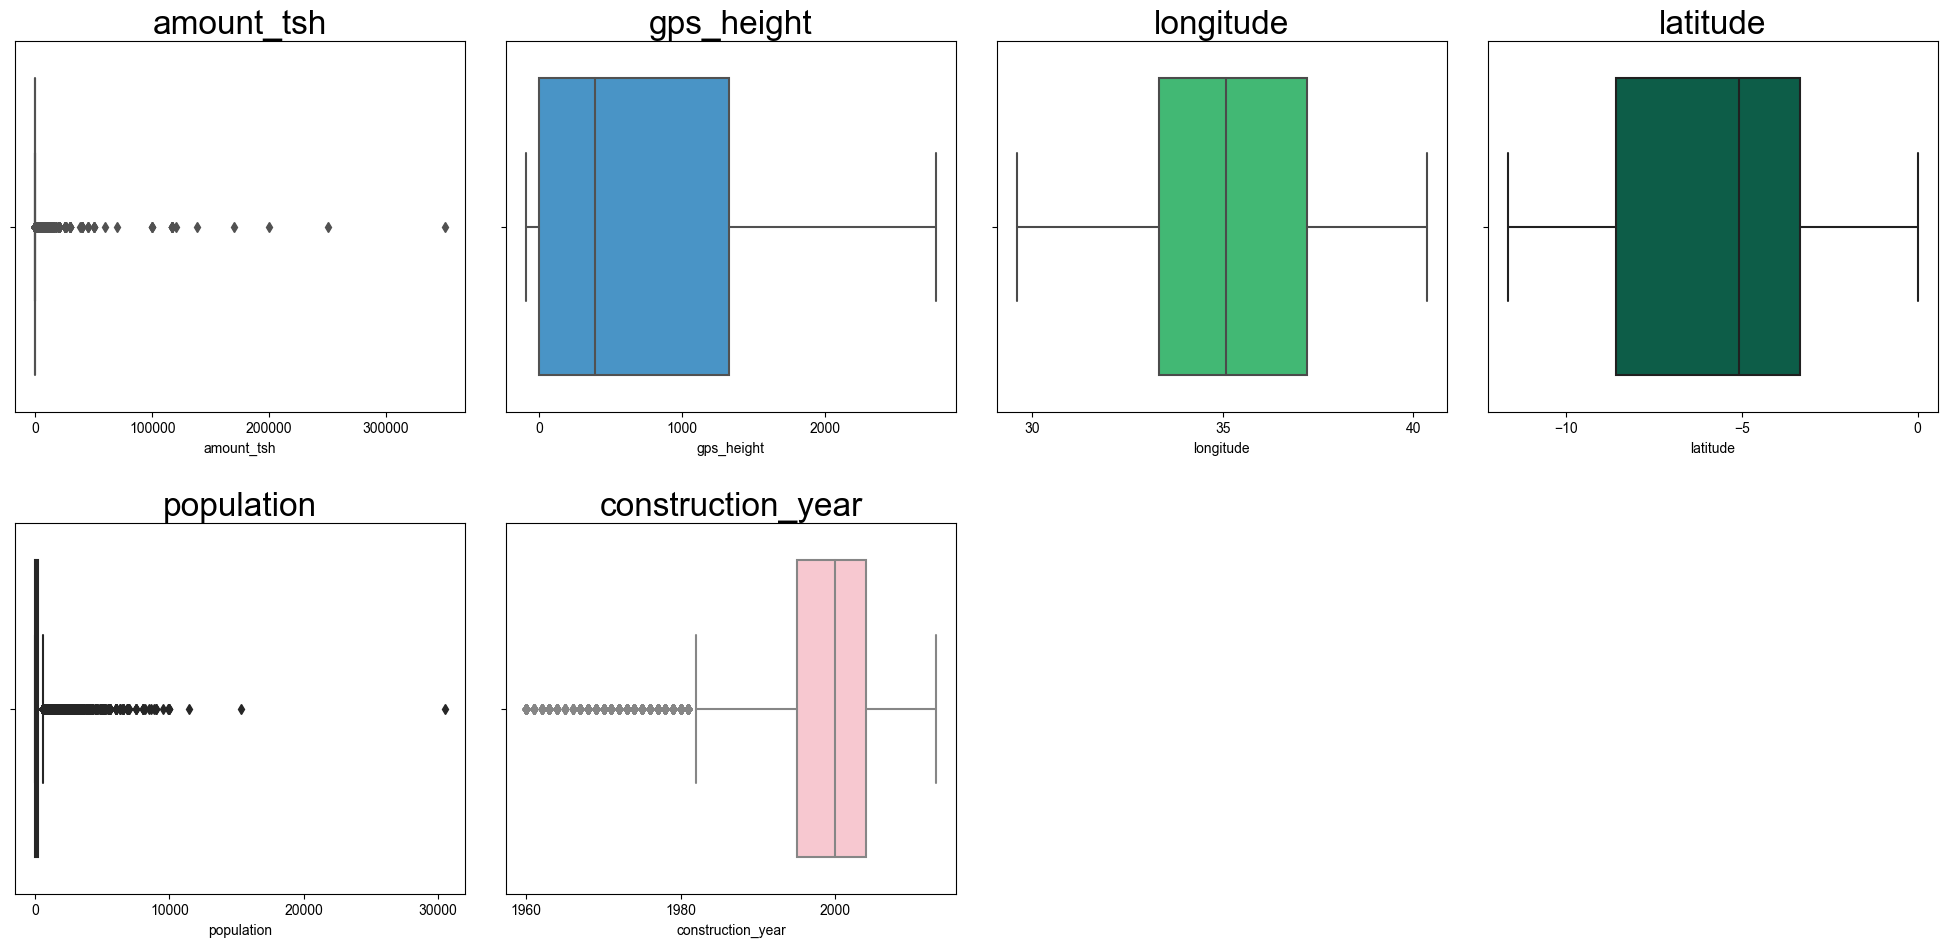

In [28]:
def plot_boxplots(data, cols):
    num_cols = len(cols)
    num_plots = min(num_cols, 8)  #maximum number of plots to 8
    
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)

    colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e", 'purple', 'pink', 'brown', 'gray']

    for i in range(num_plots):
        col = cols[i]
        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        axes[i].set_title(col)
    
    # Hiding empty subplots if there are fewer than 8 columns
    for j in range(num_plots, 8):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# calling function
cols = df.select_dtypes(include='number').columns
plot_boxplots(df, cols)


## construction_year column

[construction_year] seems to have lots of outliers but REMEMBER the dataset had 35.3% zero values (20,708) in total Which was too large to drop I filled it with median of the  general dataset Yet the value_count of period between 2000-to-2012 was at high of 32% a total of (18,764) values .This added more values in the 2000s decade creating the assumption above that 1900s figures are actually outliers while in real sence they are actual values 

## population, amount_tsh columns

[population, amount_tsh] columns definately have outliers since they dont show similar spread in the [gps_height].i will go ahead and handle  them

In [29]:
# Specifying column columns
columns_to_check = ['population', 'amount_tsh']

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Code for removing outliers 
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

#calling function
df = remove_outliers(df, columns_to_check)

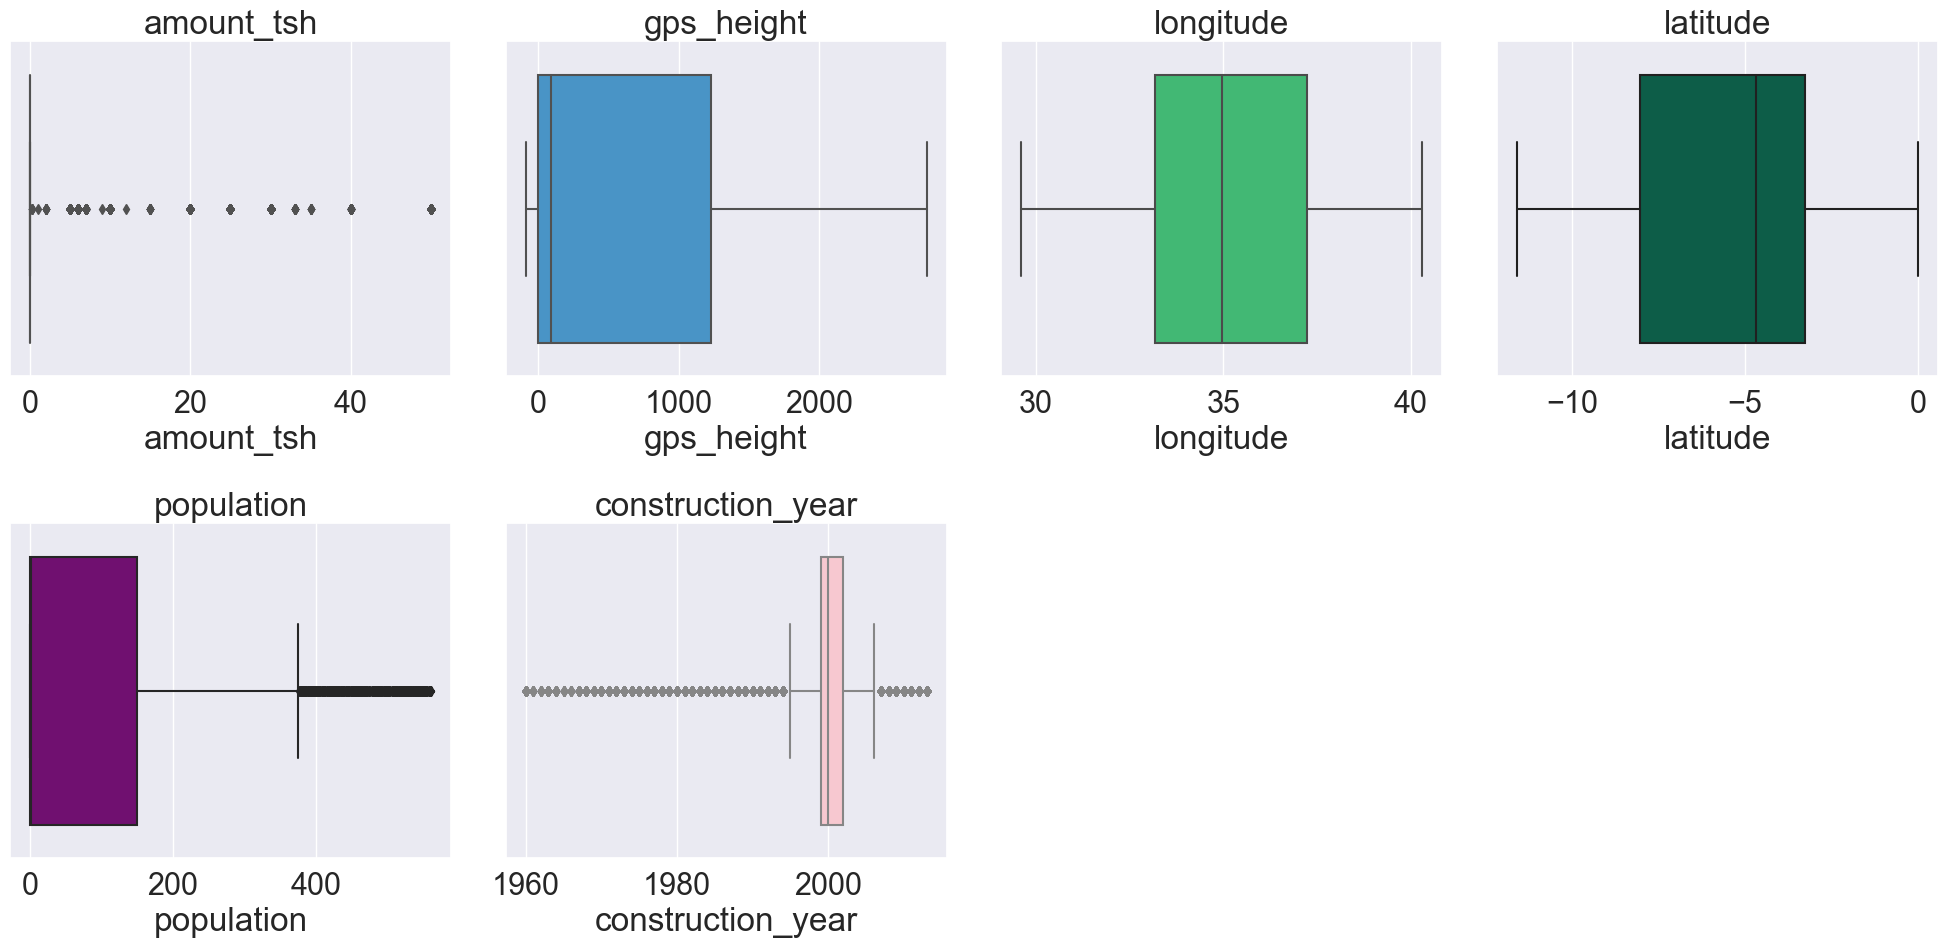

In [30]:
# previewing after removal
cols = df.select_dtypes(include='number').columns
plot_boxplots(df, cols)

## the DataFrame seems to have changed its distribution lets head to EDA and find patterns available  

In [31]:
# dataframe after cleaning and handling outliers
data_types(df)

Our dataset has 6 numeric columns
and 15 categorical columns
_________________________________________________________________________________________________
_________________________________________________________________________________________________
Numerical Columns: Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'construction_year'],
      dtype='object')
_________________________________________________________________________________________________
Categorical Coulumns: Index(['status_group', 'funder', 'installer', 'basin', 'region', 'ward',
       'public_meeting', 'permit', 'extraction_type_class', 'management',
       'payment_type', 'quality_group', 'quantity', 'source_type',
       'waterpoint_type'],
      dtype='object')


# Exploratory Data Analysis (EDA)

[status_group] is our TARGET_VARIABLE i will perform a Bivariate Analysis using it to see the functionality of waterpoints on the context of different variables...

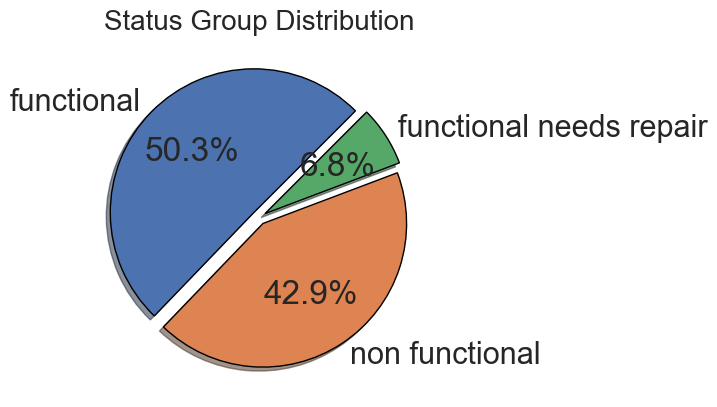

In [32]:
                  #General distribution of {'status_group'} in the Dataset
    
slices = df['status_group'].value_counts().values

labels = df['status_group'].value_counts().index 

explode = [0.05, 0.05, 0.05]

plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True, autopct='%1.1f%%', startangle=45)

plt.title('Status Group Distribution', fontsize = 20)
plt.tight_layout()
plt.show()

Just as decribed in the project overview Majority of Tanzania citizens already have access to water as confirmed by the above 50.3% Functional water points Sadly a staggering 42.9% are NoN functional potraying the neccessity for waterpoint overhaul

### The following function takes a column and plots its Bivariate relationship with 'status_group' column

In [33]:
def plot_custom_countplot(data, x_column, palette='Set1'):
    plt.figure(figsize=(15, 4))
    sns.countplot(x=x_column, hue='status_group', data=data, palette=palette, 
                  order=data[x_column].value_counts().head(20).index)
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.title(f'{x_column} Count by Status Group')
    plt.xticks(rotation=90)
    plt.legend(title='Status Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

####   Infrastructure & Management  Columns
###### funder ,installer, management,public_meeting,permit

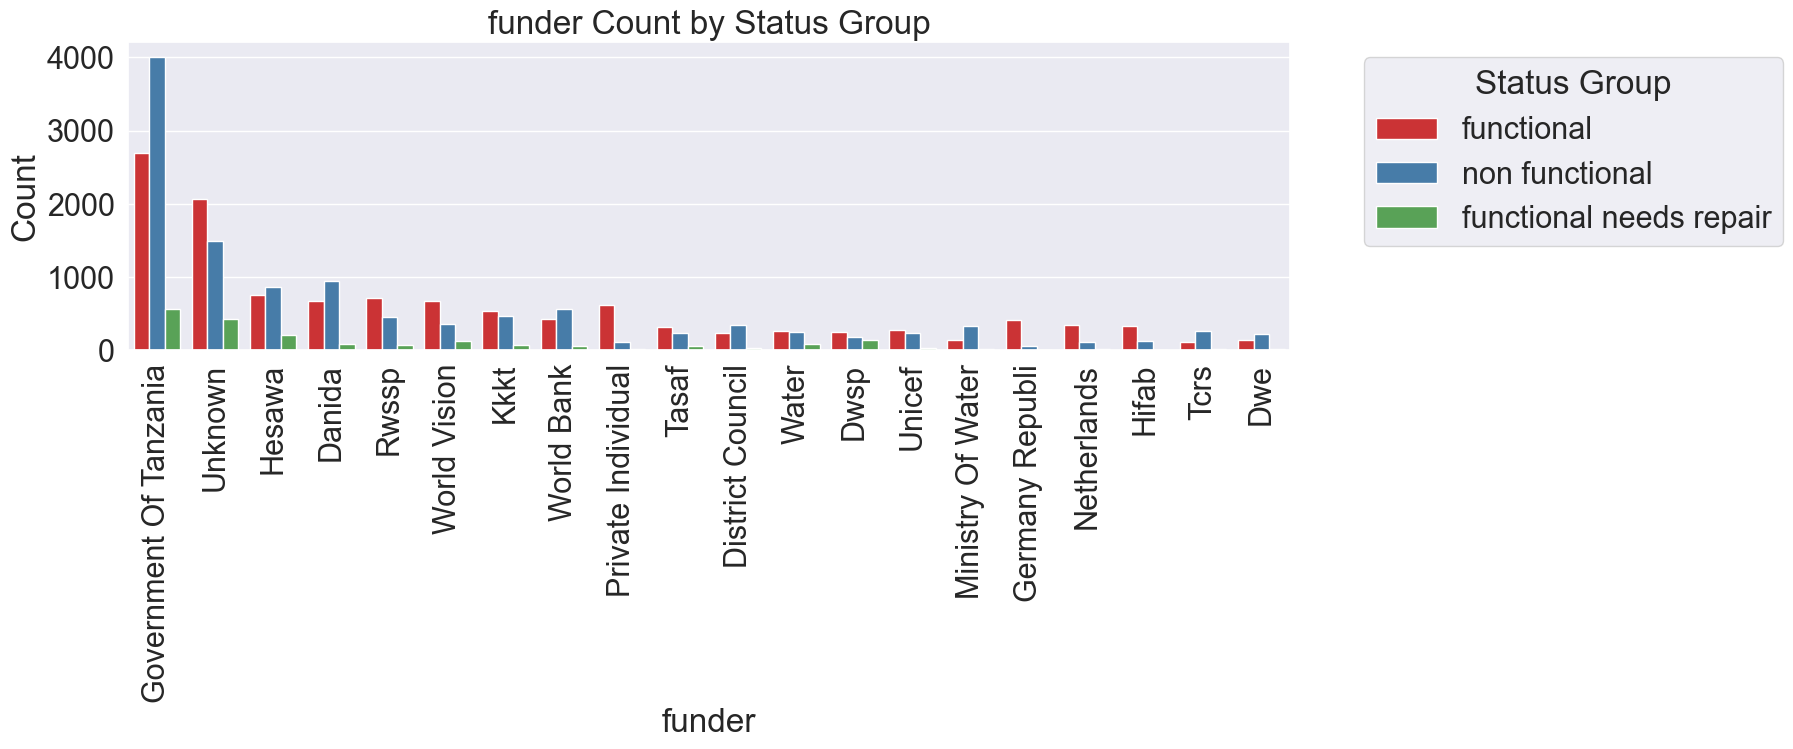

In [34]:
plot_custom_countplot(df, 'funder', palette='Set1')

Most of the funding is done by the Government of Tanzania and another category institution that remains unkmown ...from the above analysis it's unfortunate that most of the waterpoints funded by the Government are non functional yet the ones funded by private individuals have a good sum of 615 functional waterpoints out of 744 .its also intresting to see the district council funding more water points than the ministry of water and almost having a similar value of functional waterpoints

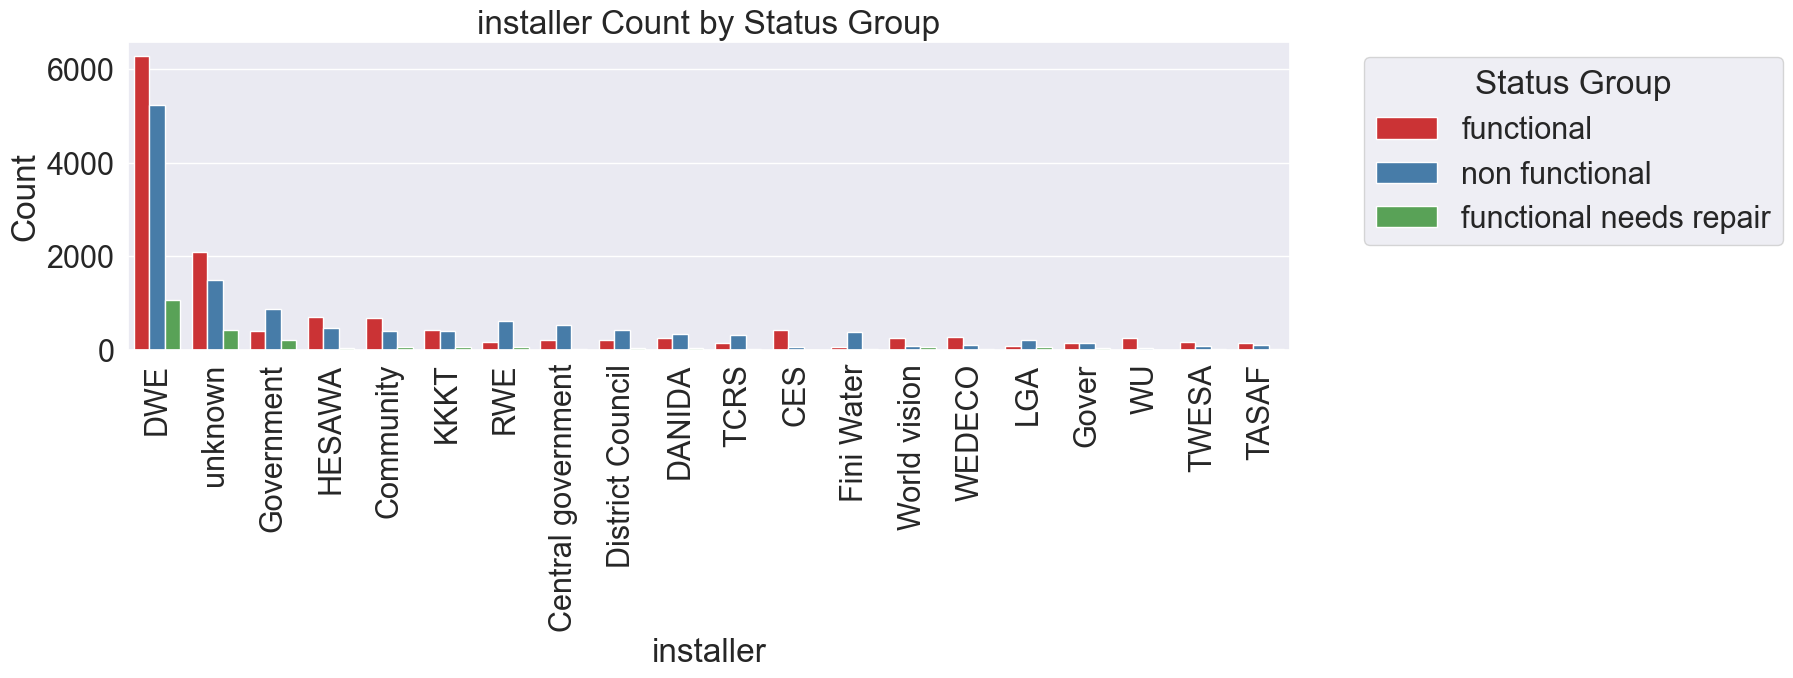

In [35]:
plot_custom_countplot(df, 'installer', palette='Set1')

Top installers are DWE which installed 12,566 waterpoints and 50% are still functional but 41% are non functional. The Government installed 1477 waterpoints ,59% are functional but 27% are non functional.The unknown installers installed 3996 waterpoints 52% are functional but 37% are non functional

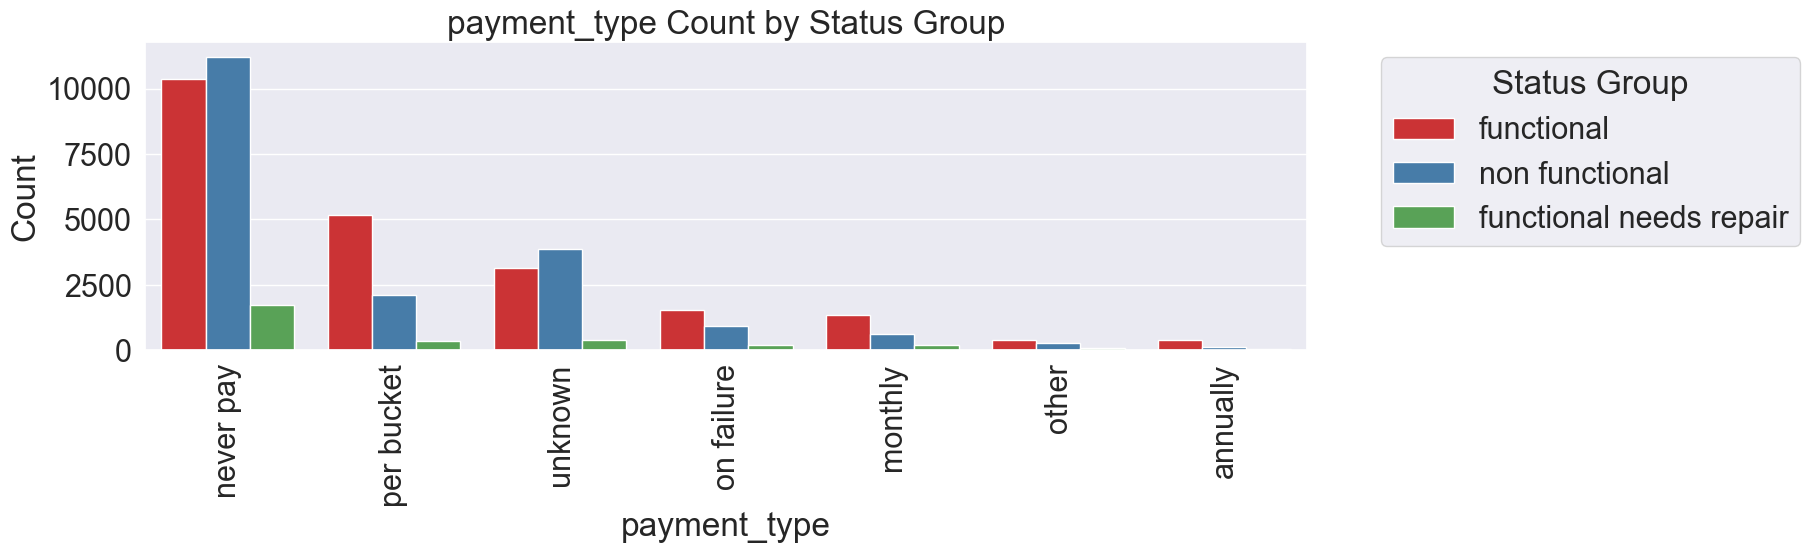

In [36]:
plot_custom_countplot(df, 'payment_type', palette='Set1')

23278 Waterpoints use [never pay payment type]that has a very poor record of 11210 non functional water points thats 48% as compared to the functional waterpoints having 44% of the same payment_type .the [per bucket] payment type seem to be doing better.out of a total 7644 waterpoints 68% are functional and 27% are non functional

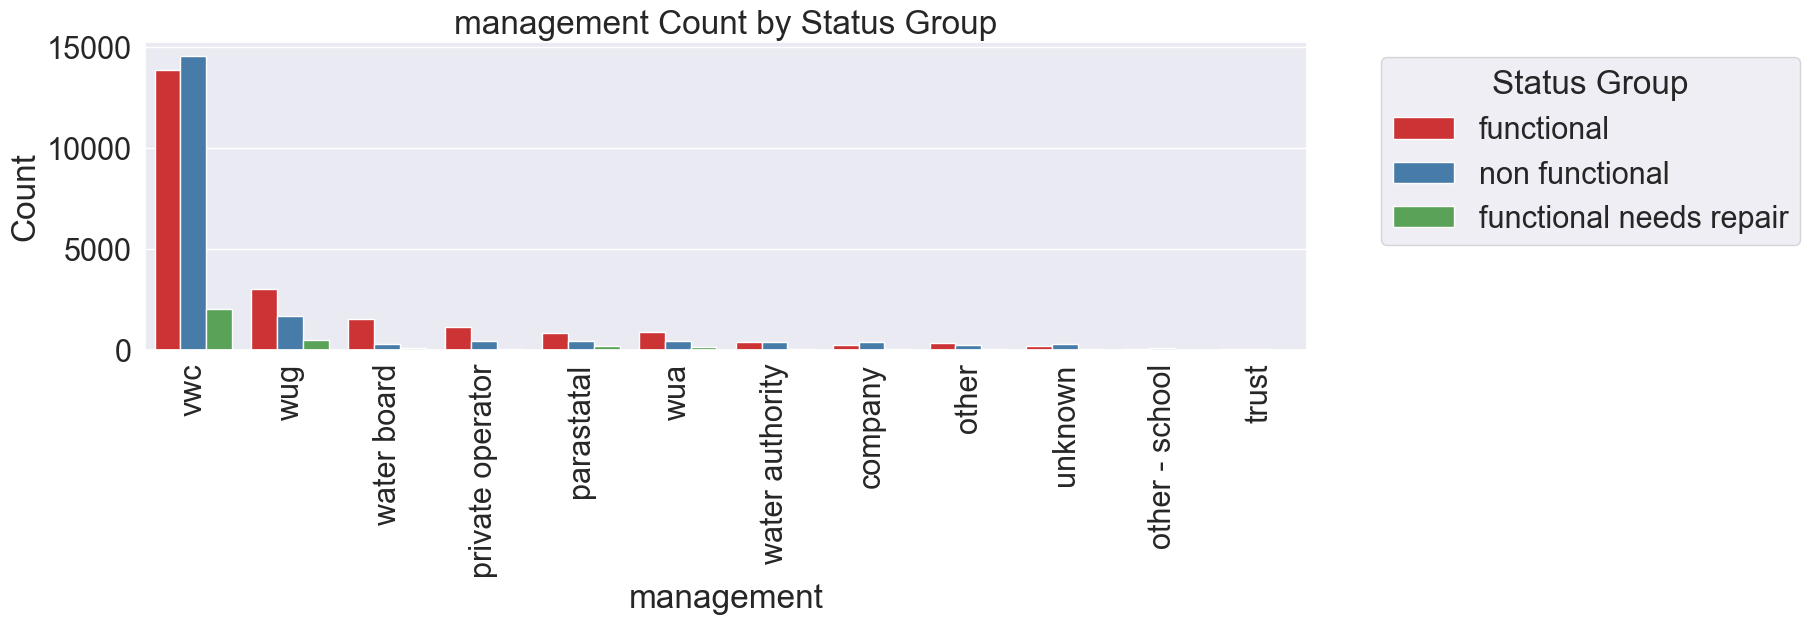

In [37]:
plot_custom_countplot(df, 'management', palette='Set1')

[vwc] management has the most waterpoints with a total of 30373 but 49% are non functional and 45% are functional they are followed by [wug] management that has 5103 waterpoints 58% are functional and 1649 are non functional. The most impressive management is the  [water board] management having 1888 water points yet 80% are functional

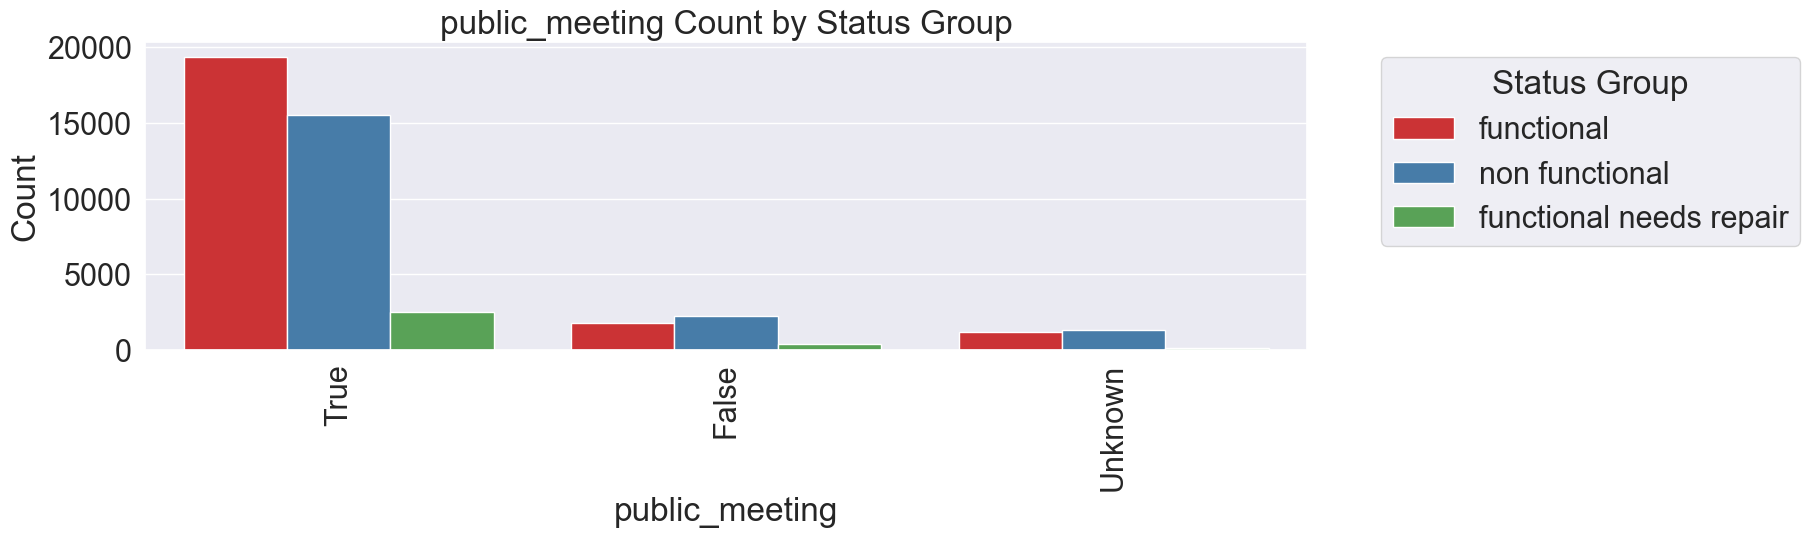

In [38]:
plot_custom_countplot(df, 'public_meeting', palette='Set1')

From the above analysis its clear that waterpoints that have more public meetings have more functional water points this could mean management takes peoples claims seriously

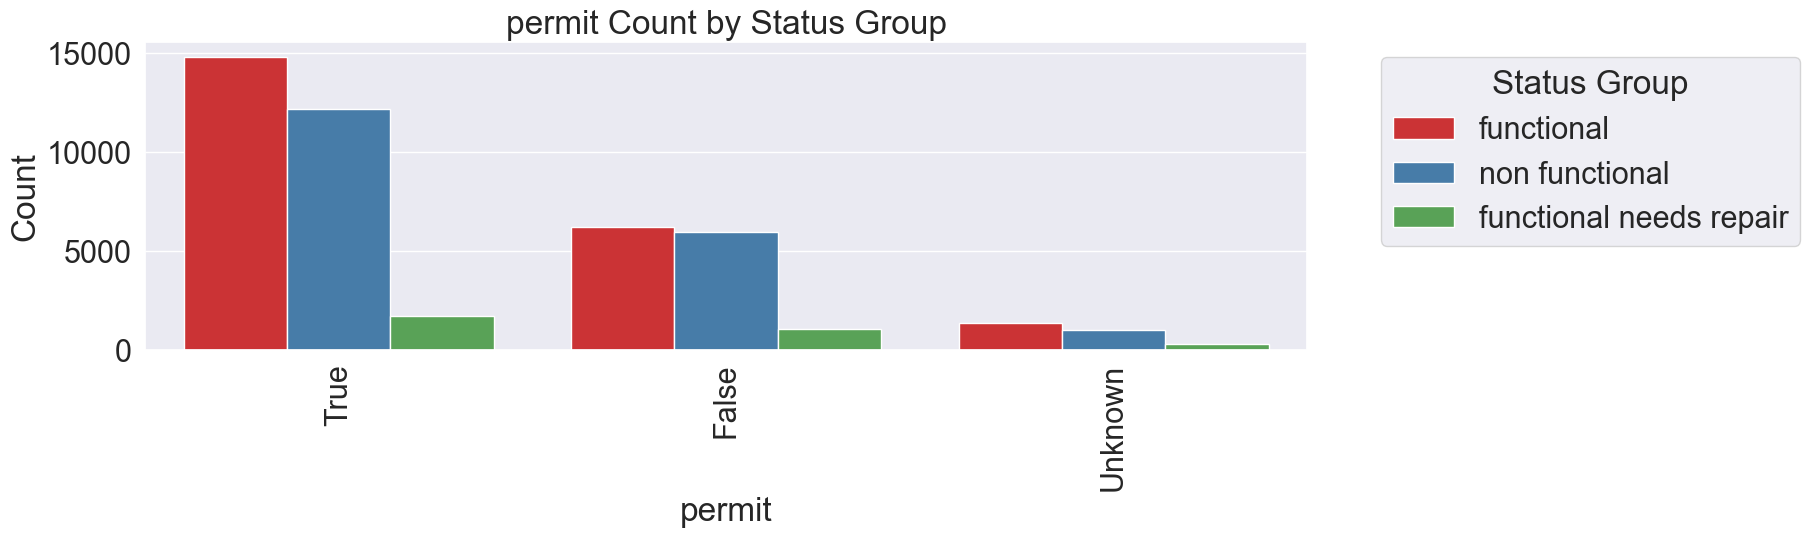

In [39]:
plot_custom_countplot(df, 'permit', palette='Set1')

Water points that have permits [True] evidently have more functional water points as compared to those [false] that dont have permits

### Geographical Columns
#### gps_height, longitude,latitude,basin,region,ward,population

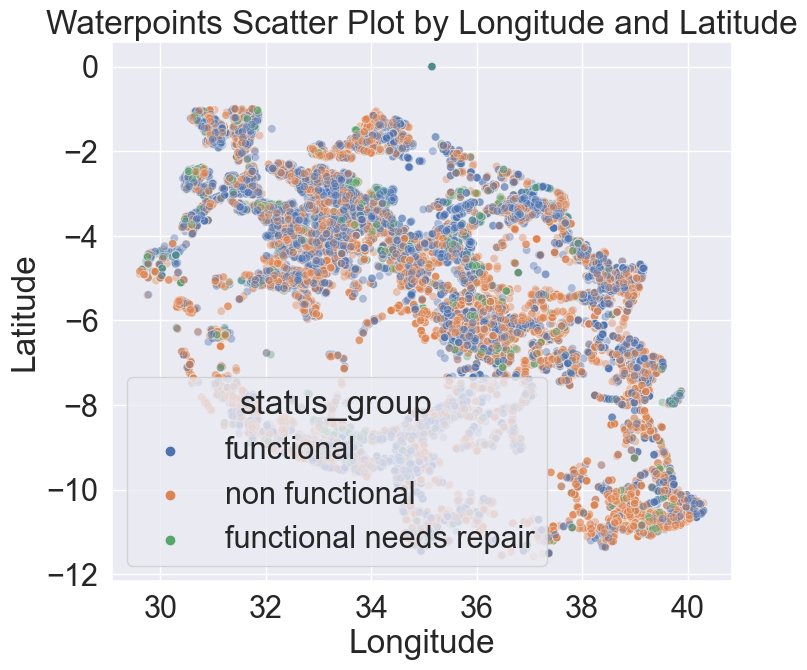

In [40]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="longitude", y="latitude", data=df, hue="status_group", alpha=0.4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Waterpoints Scatter Plot by Longitude and Latitude')
plt.show()


The geographic map above explicity shows a well spread of functional and none functional waterpoints --lets look at better detailed columns below

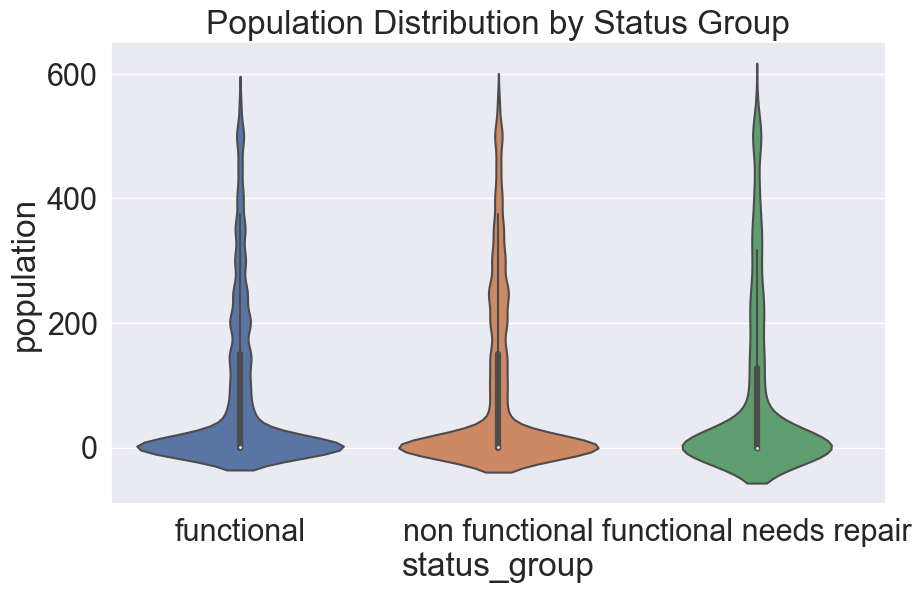

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='status_group', y='population', data=df)
plt.title('Population Distribution by Status Group')
plt.show()

The zero figures in our population dataset have  dencesed the violin plot above but generally population seems to be evenly spread around functional, non functional funtional needs repair  waterpoints

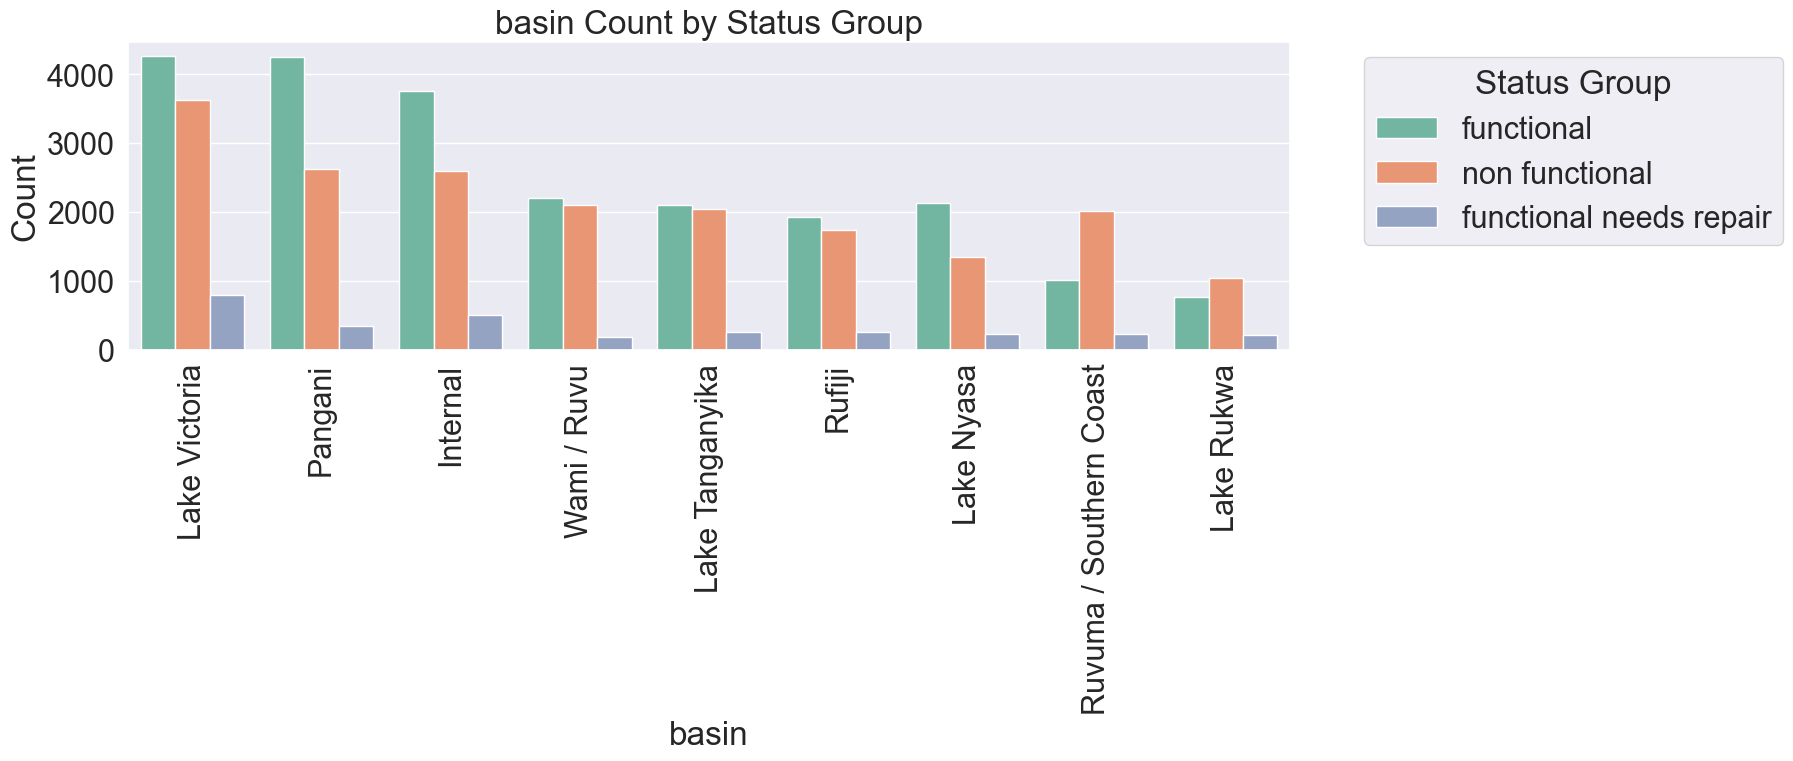

In [42]:
plot_custom_countplot(df, 'basin', palette='Set2')

Lake victoria and Pangani, Internal basins are leading with  22,749 waterpoints collectively. [lake victoria] carries 8678 waterpoints where 49% are functional and 41% non functional [pangani] carries 7215 waterpoints where 58% are functional and 36% are non functional .[internal] basin carries 6856 waterpoints where 54% are functional and 37% are non functional 

I grouped regions with filtered populations below

<Figure size 1200x600 with 0 Axes>

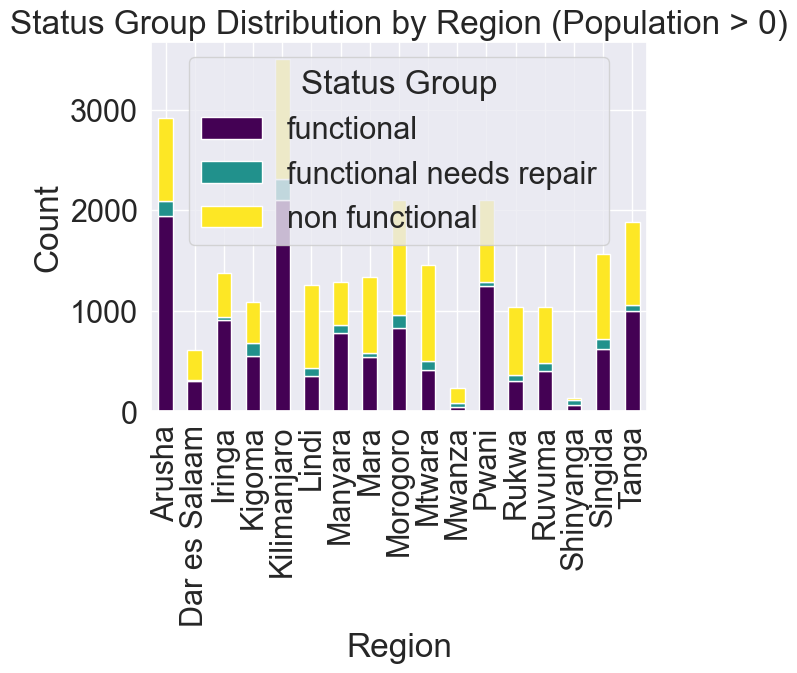

In [43]:
# DataFrame where population > 0
filtered_df = df[df['population'] > 0]

# occurrences of each 'status_group' for different 'region' values
status_region_counts = filtered_df.groupby(['region', 'status_group']).size().unstack(fill_value=0)

# Plotting the data using grouped bar plot
plt.figure(figsize=(12, 6))

status_region_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Status Group Distribution by Region (Population > 0)')
plt.xticks(rotation=90)  
plt.legend(title='Status Group')
plt.show()


[Kilimanjaro] and [Arusha] being amongest Tanzania populus cities had a collective 4037 waterpoints with Kilimanjaro having 2096 waterpoints which is 61% functional  waterpoints .Arusha has 1941 waterpoints which is 66% functional waterpoints and 28% non functional waterpoints [Dar es Salaam] despite its fame has more 49.7% non functional water points

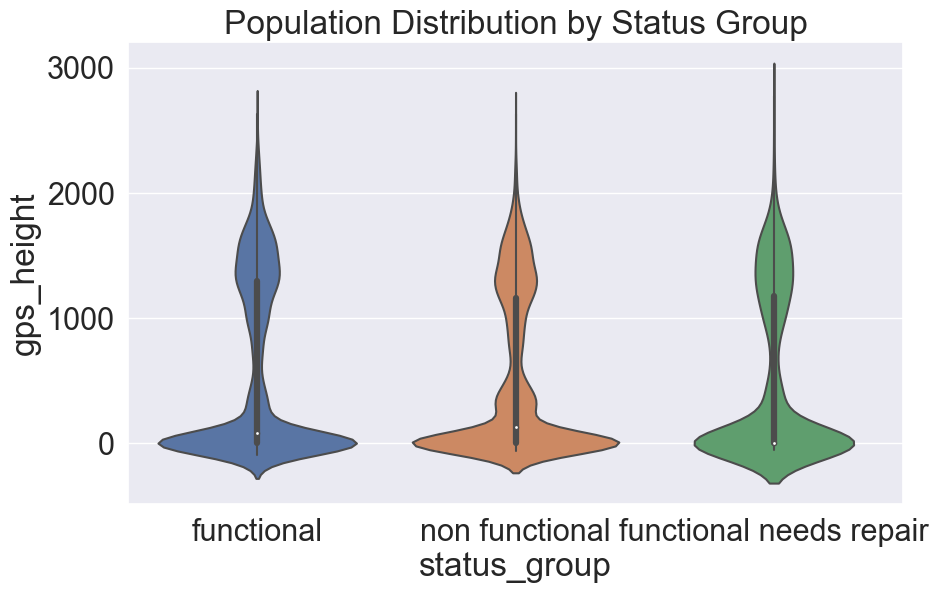

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='status_group', y='gps_height', data=df)
plt.title('Population Distribution by Status Group')
plt.show()

 In Tanzania, the average elevation stands at 1018 meters above sea level, wells in this region as seen in the above plot are  generally situated at a similar or slightly lower altitude. This altitude factor holds significant importance; as altitude increases, air pressure decreases, subsequently reducing water pressure within the aquifer. Consequently, wells positioned at higher altitudes might yield less water compared to those at lower altitudes.

### Waterpoint characteristics
#### amount_tsh, waterpoint_type , construction_decade, extraction_type_class

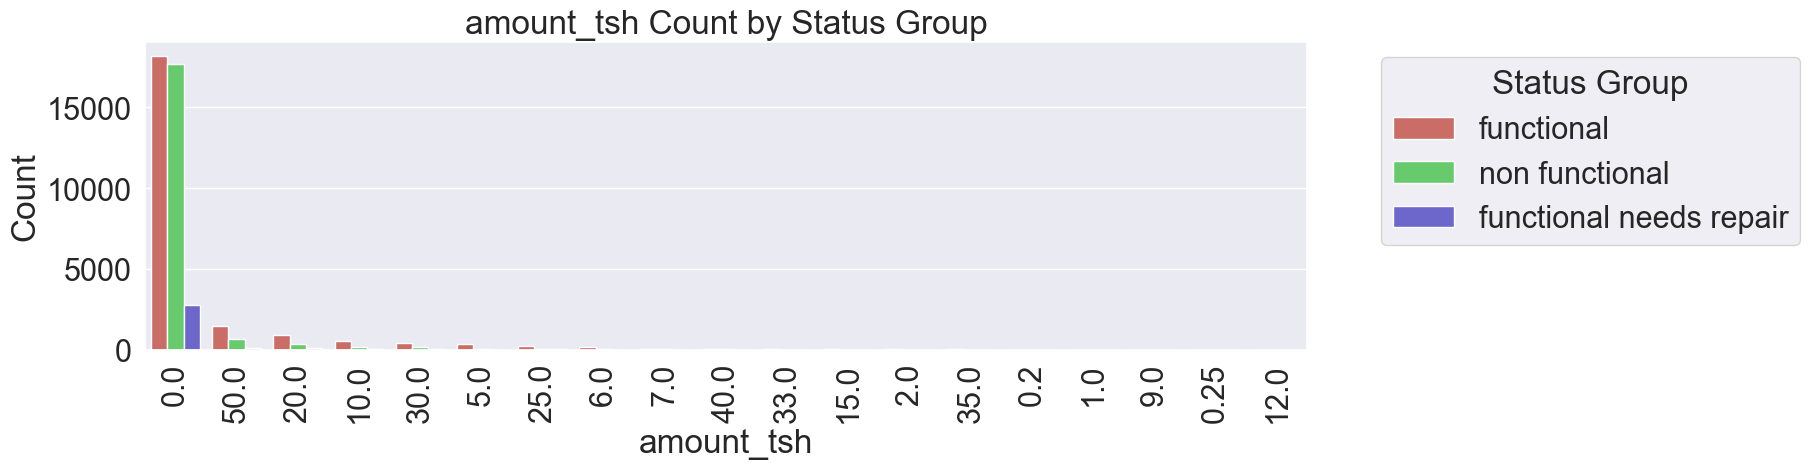

In [45]:
plot_custom_countplot(df, 'amount_tsh', palette='hls')

the static head of water in wells, contains numerous zero values. Surprisingly, among these zeros, 47%(18,172) correspond to functional water points, indicating that a substantial portion of operational wells does not have a measurable static head. Similarly, 46%(17,663) of the zero values align with non-functional water points, emphasizing that the absence of a recorded static head does not guarantee non-functionality.

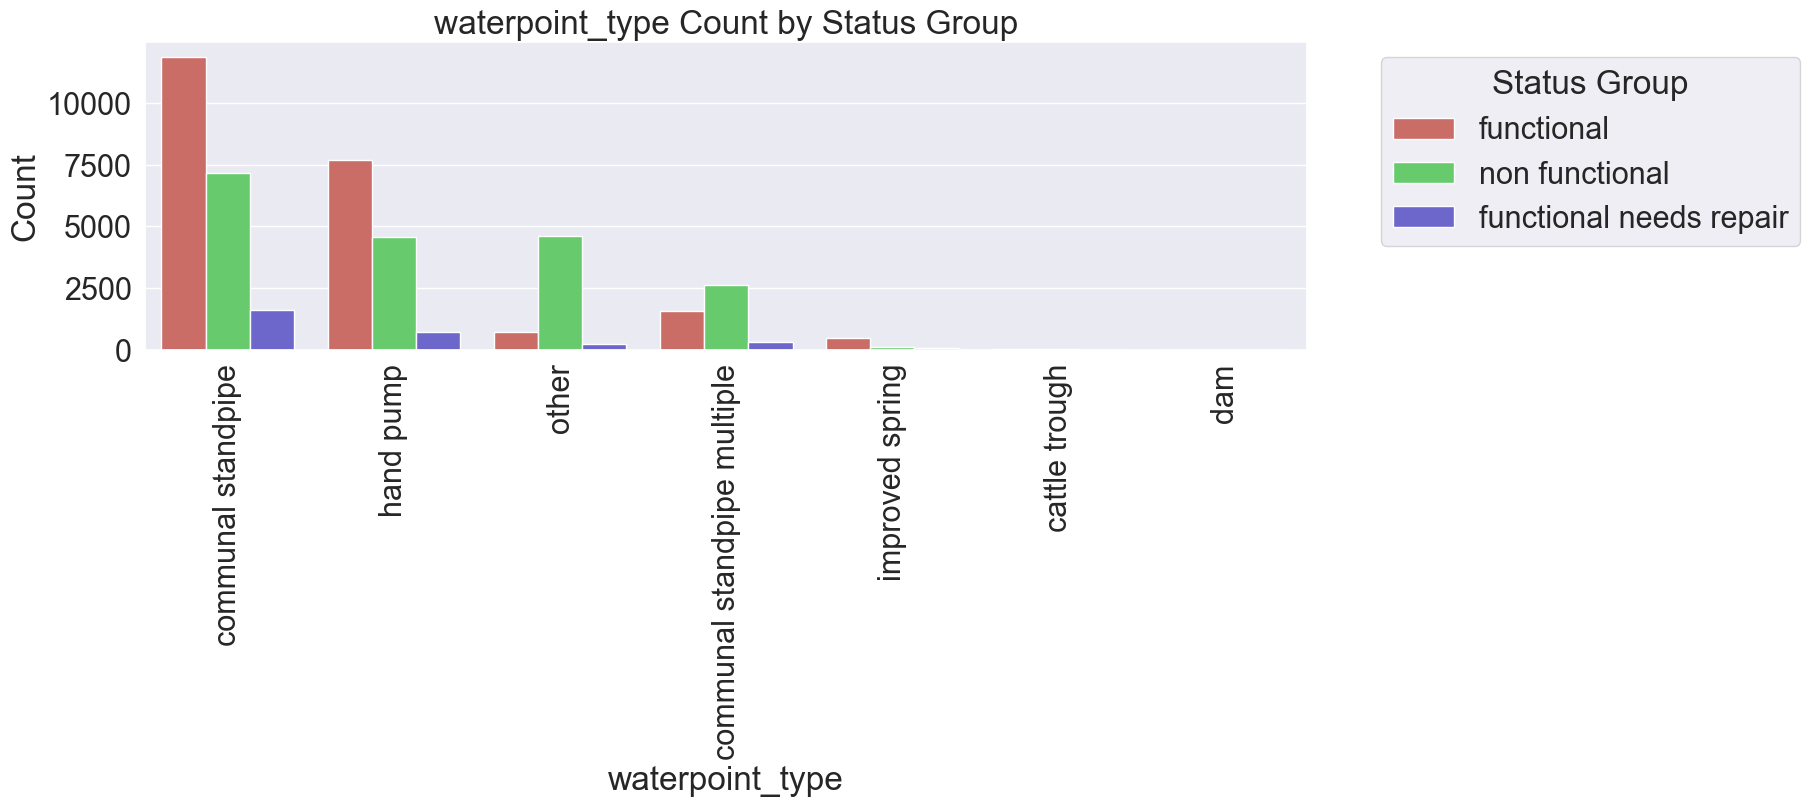

In [46]:
plot_custom_countplot(df, 'waterpoint_type', palette='hls')

[communal standpipe] is used in a total of 20,647 waterpoints 57% are functional while 34% are non functional ...[handpipe] is used in 12,974 waterpoints 59.11% are still functional and 35% non Functional [Other_waterpoint_types] has alot of non functional waterpoints 

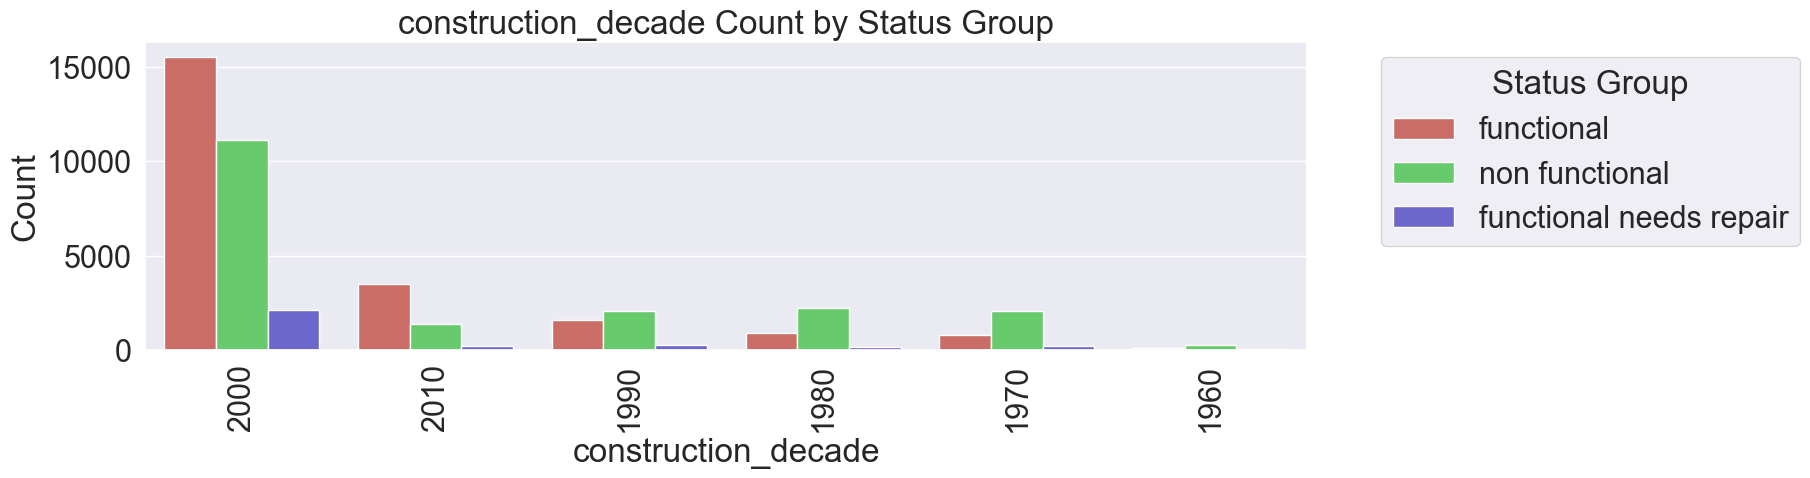

In [47]:
plot_custom_countplot(df, 'construction_decade', palette='hls')

A total of 28,759 waterpoints were constructed between 2000-2009 ,53% remain functional 38% are non functional /A total of 5046 waterpoints were constructed between 2010-2012 ,69% remain functional 27% are non functional /A total of 10,707 waterpoints were constructed between 1960-1999 But unfortunately most of them are non functional

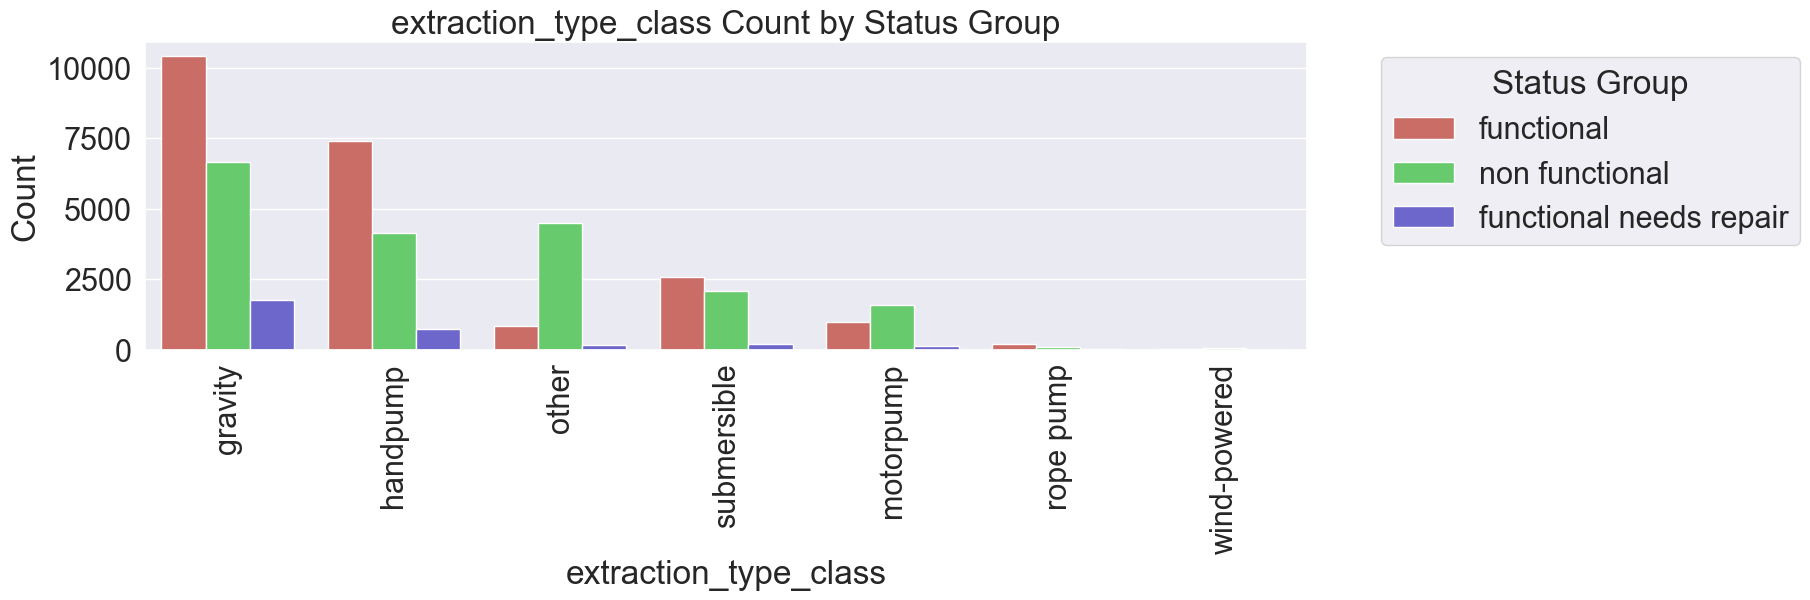

In [48]:
plot_custom_countplot(df, 'extraction_type_class', palette='hls')

gravity and handpump has more functional water points  this could be because Water flows naturally from a spring or a well due to the force of gravity ...lets confirm below the water sources 

### Water Quality and Availability Columns
#### quality_group,quantity,source_type

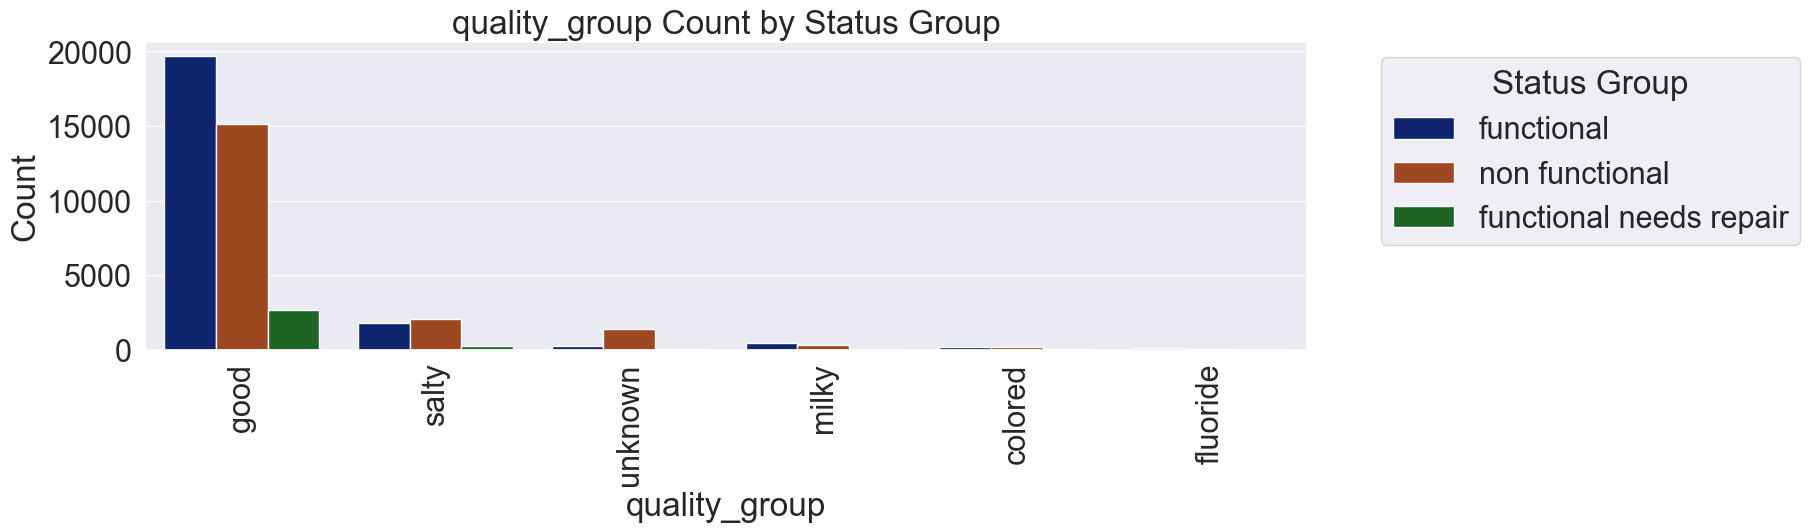

In [49]:
plot_custom_countplot(df, 'quality_group', palette='dark')

A total of 34,783 waterpoints has good quality water , 56% were functional and 43% were non functional and a total of 4082 waterpoints had salty water with 51% non functional and 43.2% functional its quite clear that good quality water is  preferred in Tanzania by the range the of waterpoints  and also the functional waterpoints 

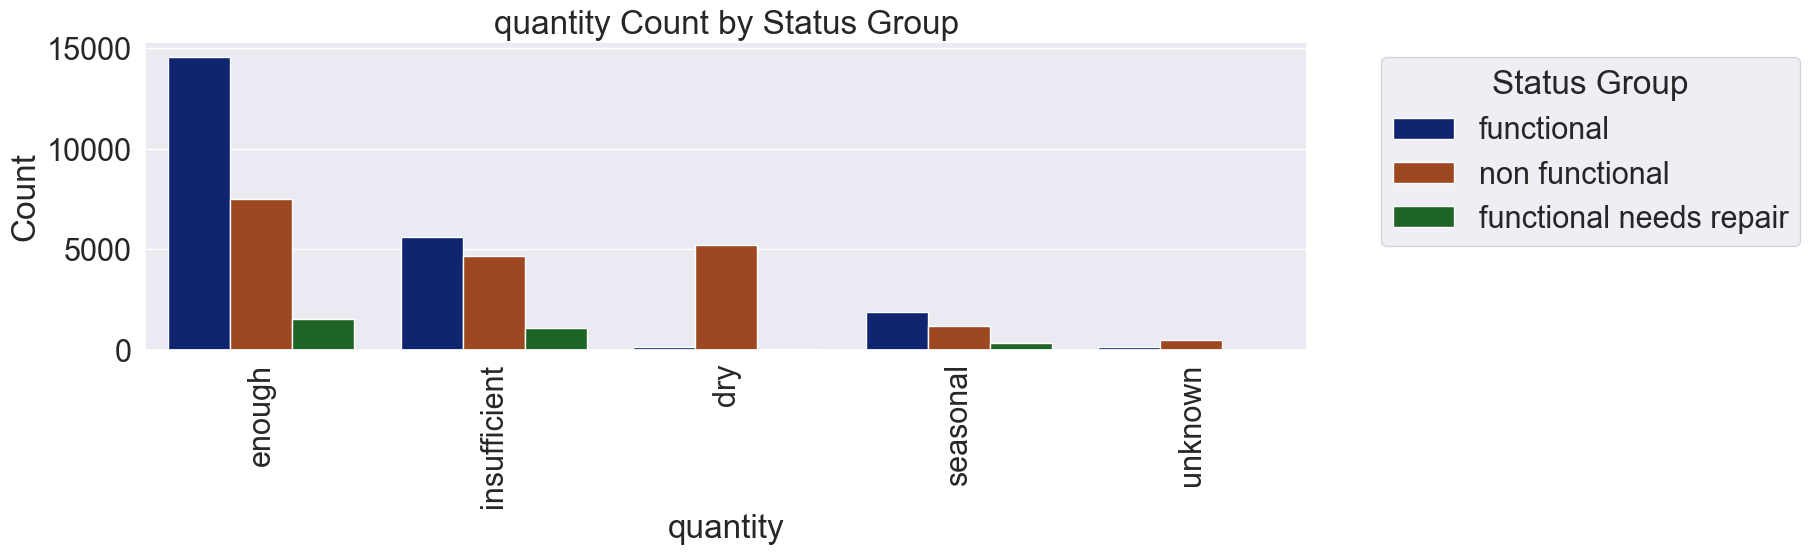

In [50]:
plot_custom_countplot(df, 'quantity', palette='dark')

There is definately a huge correlation between functionality and water quantity- Water points that had enough water had a total of 23,637 waterpoints ,61.7% functional and 31.8% non functional while dry quantity had 5414 waterpoints  96.8% being NON functional

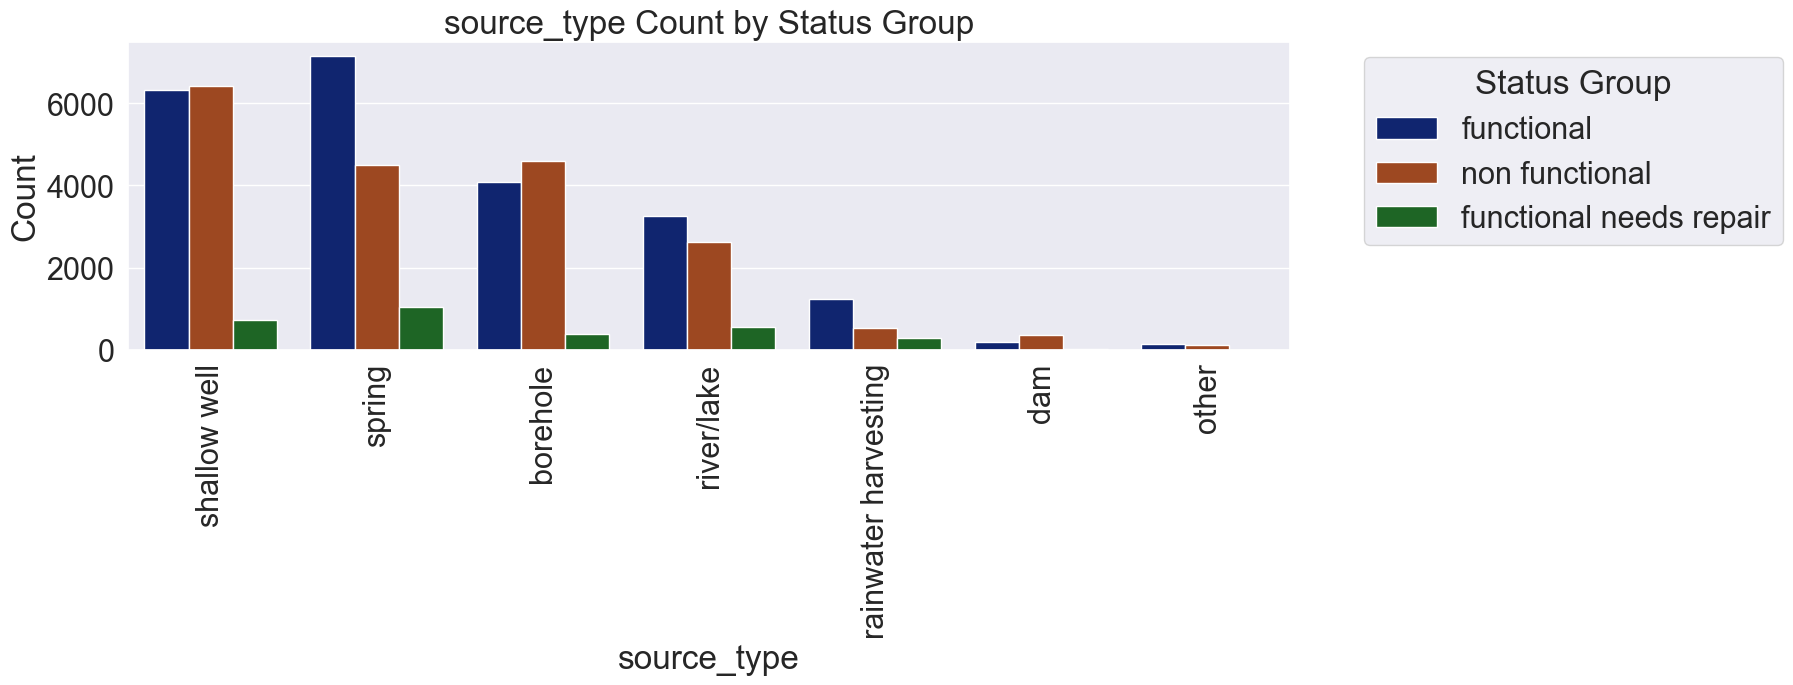

In [51]:
plot_custom_countplot(df, 'source_type', palette='dark')

Waterpoints that relied on gravity seem to be doing better in terms of functionality this can be seen by spring ,rainwater above Boreholes and shallow wells that rely on mechanical extraction means are doing poorly having more non functional water pumps than functional 

In [52]:
df.columns

Index(['status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region', 'ward', 'population',
       'public_meeting', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'payment_type', 'quality_group',
       'quantity', 'source_type', 'waterpoint_type', 'construction_decade'],
      dtype='object')

#         MODELING

_The project requirement is a binary classification model but The Target variable is in Ternary format i will go ahead turn the values into a binary value through  Binarization then load MultiClassifier that will enable modeling 

_Only Columns That prooved to have positive relation during EDA will be used for modelling  they are as follows: 

X = ['construction_decade','permit','public_meeting','payment_type','extraction_type_class','quantity','source_type']
Y = [status_group]

### Binarization

In [53]:
# binarizing the TARGET ternary column
binary_columns = pd.get_dummies(df['status_group'], prefix='ternary')

# Adding the columns into the DataFrame
df = pd.concat([df, binary_columns], axis=1)

#### Making a Data Frame for modeling 

In [54]:
#making model_DataFrame
model_df = df[['ternary_functional','ternary_functional needs repair','ternary_non functional','construction_decade','permit',
               'public_meeting','payment_type','extraction_type_class','quantity','source_type']]
#confirming shape 
model_df.shape

(44512, 10)

#### One Hot Encoding the categoricals in the model_df to make X variables [new_df]

In [55]:
# One Hot Encoding
categoricals = ['construction_decade','permit','public_meeting','payment_type','extraction_type_class','quantity','source_type']
new_df = pd.get_dummies(model_df[categoricals], prefix = categoricals, drop_first=True )

#### Getting binarized Y varaible from the model_df to make [y_df]

In [56]:
# sub DataFrame for my Y variable
y_df = model_df[['ternary_functional','ternary_functional needs repair','ternary_non functional']]

#### Train-Test-split

In [57]:
# Defining x and y
X = new_df
y = y_df

# Performing train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODEL1_ RandomForest

In [58]:
# loading the MultiOutPutClassifier
from sklearn.multioutput import MultiOutputClassifier

In [59]:
#Instantiating RandomForest Classifier
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_1.fit(X_train, y_train)

# Making predictions on the test data
y_pred1 = model_1.predict(X_test)


MODEL1 Evaluation

In [60]:
def print_metrics(labels, preds):
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')

    print("Precision Score: {:.2f}".format(precision))
    print("Recall Score: {:.2f}".format(recall))
    print("Accuracy Score: {:.2f}".format(accuracy))
    print("F1 Score: {:.2f}".format(f1))

# Calling metric function
print_metrics(y_test, y_pred1)


Precision Score: 0.75
Recall Score: 0.71
Accuracy Score: 0.71
F1 Score: 0.71


### MODEL_2, DecisionTreeClassifier

In [61]:
#instantiating Decision-Tree-Classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Instantiating the MultiOutputClassifier with the DecisionTreeClassifier as the base classifier
model_2 = MultiOutputClassifier(base_classifier)

# Training the Model_2 on training data
model_2.fit(X_train, y_train)

# Making predictions using the trained model_2
y_pred2 = model_2.predict(X_test)

# Calling Metric Function 
print_metrics(y_test, y_pred2)


Precision Score: 0.75
Recall Score: 0.70
Accuracy Score: 0.70
F1 Score: 0.70


### Model-3, GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
# Instantiating the GradientBoostingClassifier()
base = GradientBoostingClassifier(random_state=42)

# Instantiating the MultiOutputClassifier with the GradientBoostingClassifier 
model_3 = MultiOutputClassifier(base)

# Training the Model_3 on the training data
model_3.fit(X_train, y_train)

# Make predictions using the trained multi-output classifier
y_pred3 = model_3.predict(X_test)

# Calling Metric Function 
print_metrics(y_test, y_pred3)


Precision Score: 0.76
Recall Score: 0.69
Accuracy Score: 0.69
F1 Score: 0.69


### General  Model Evaluation Metric statement

My evaluation of machine learning models, including RandomForest, Decision Tree, and Gradient Boosting, reveals a consistent level of performance across various metrics. The RandomForest and Decision Tree models demonstrate commendable Precision Scores, signifying their ability to accurately classify positive instances, while maintaining balanced Recall Scores, indicating their proficiency in capturing actual positive cases. These models exhibit robust Accuracy Scores, emphasizing their overall correctness in predictions, and F1 Scores that harmonize precision(75) and recall, showcasing their balanced performance.

In comparison, the Gradient Boosting model demonstrates a slightly higher Precision Score(76), denoting its superior accuracy in identifying positive cases. Although it has a marginally lower Recall Score, the model maintains a competitive level of performance by achieving balanced Accuracy and F1 Scores. These results collectively indicate that all models are valuable assets, with the Gradient Boosting model standing out for its precise classification. Our findings underscore the reliability of these models in practical applications, demonstrating their ability to make accurate and well-rounded predictions.

### Feature Importance

In [63]:
def plot_feature_importance(model, X_train, top_n=10, model_name='Model', bar_color='skyblue'):
    
    if isinstance(model, MultiOutputClassifier):
        feature_importances = np.mean([estimator.feature_importances_ for estimator in model.estimators_], axis=0)
    else:
        feature_importances = model.feature_importances_

    # Extract feature names from the DataFrame (assuming X_train is a DataFrame)
    feature_names = X_train.columns

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color=bar_color)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'{model_name} Feature Importance')
    plt.show()

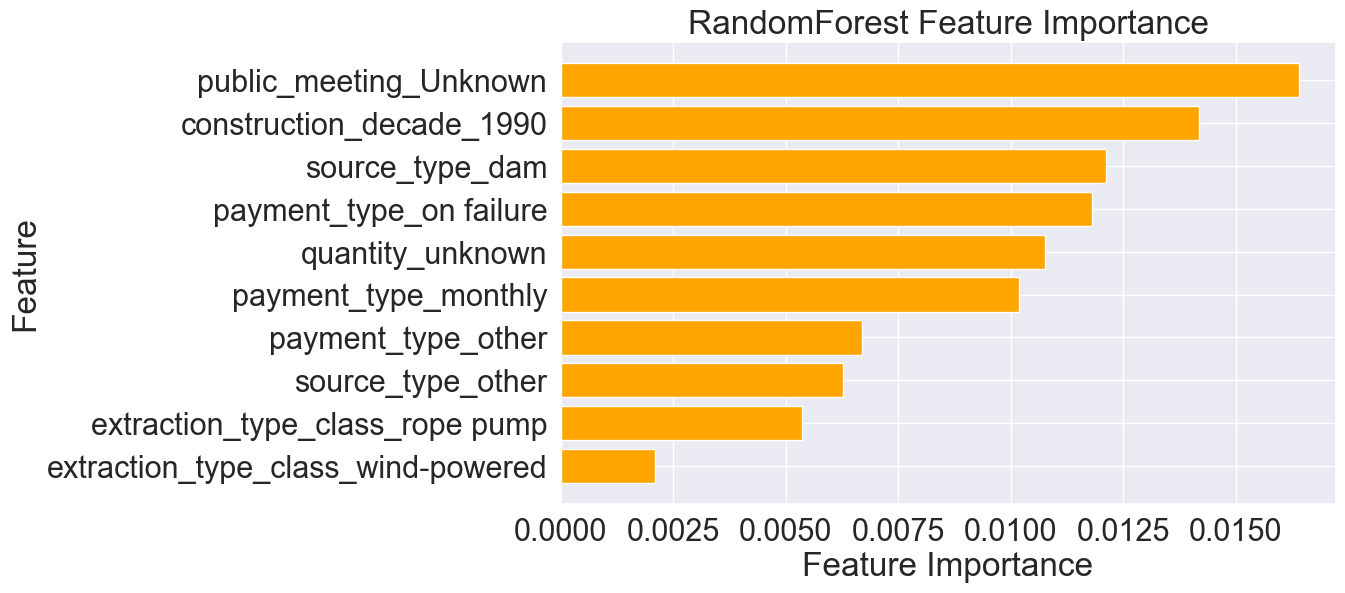

In [64]:
# feature importance  for Random Forest model
plot_feature_importance(model_1, X_train, top_n=10, model_name='RandomForest', bar_color='orange')


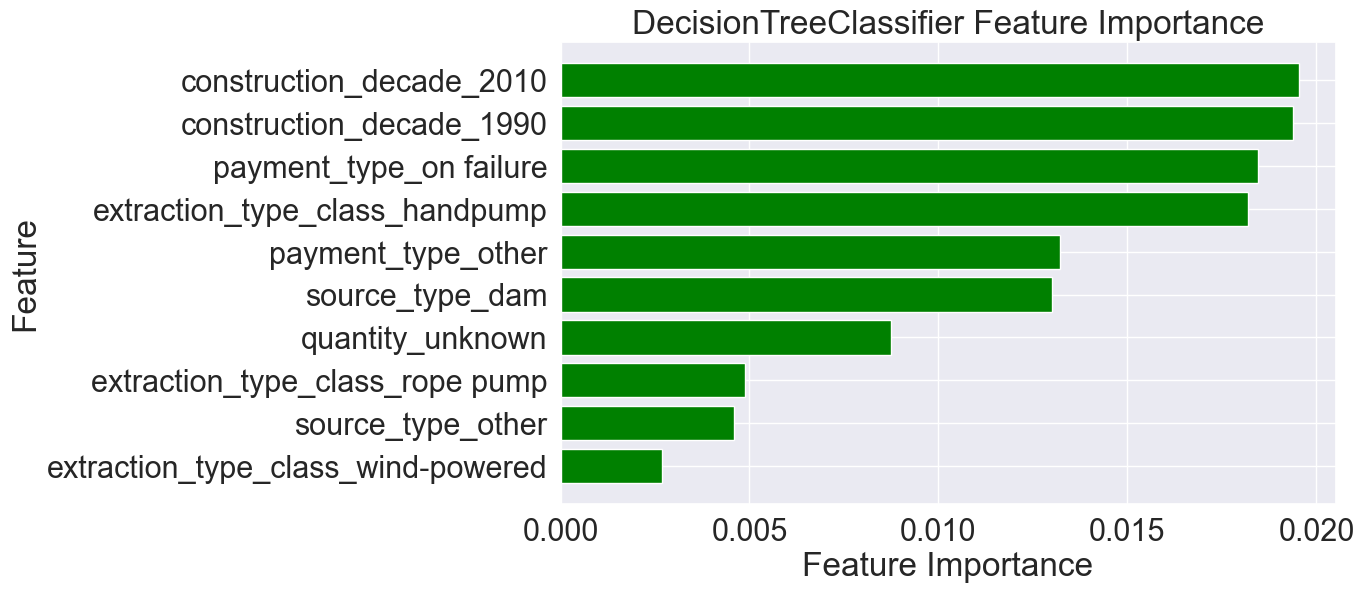

In [65]:
# feature importance  for Decision Tree Classifier
plot_feature_importance(model_2, X_train, top_n=10, model_name='DecisionTreeClassifier', bar_color='green')


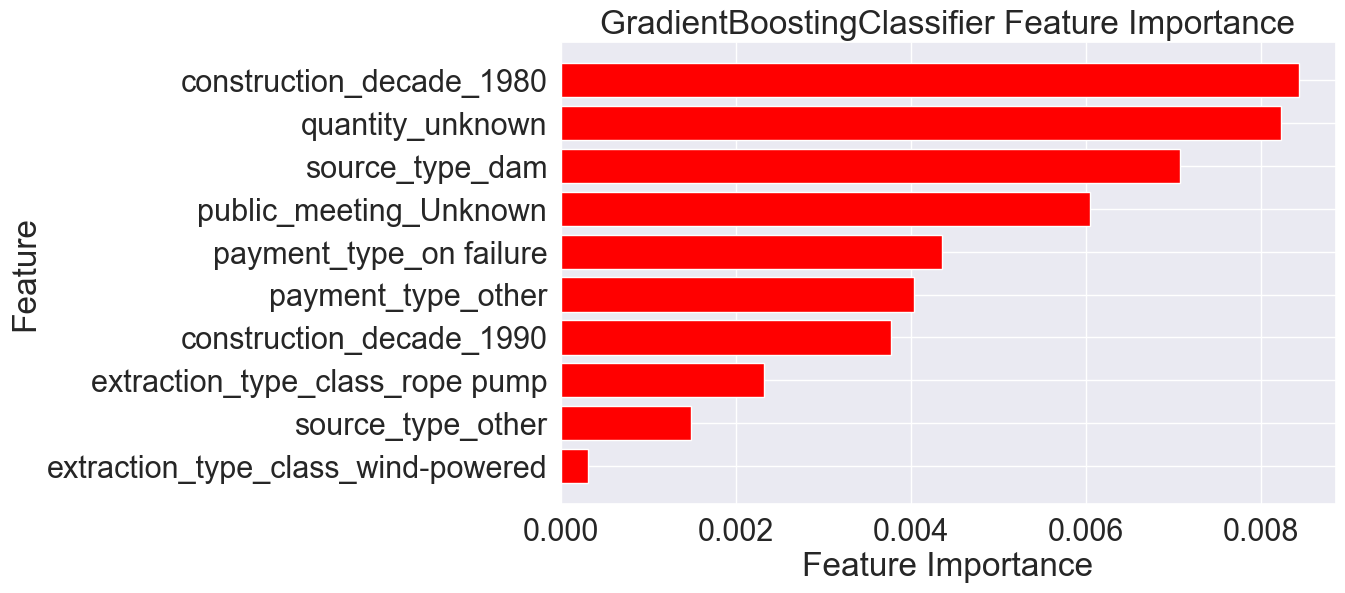

In [66]:
plot_feature_importance(model_3, X_train, top_n=10, model_name='GradientBoostingClassifier', bar_color='red')


# Recommendation

_I strongly advise that UN-Habitat collaborates closely with the government to efficiently mobilize funds, ensuring a substantial capital influx for the initiative’s success. Once the initiative is launched, contracting the Department of Water and Environment (DWE) for water pump installations is highly recommended.

_Key features like "construction deacde","permit","public meeting","payment type","quantity","source type" serve as vital indicators of water pump functionality. The organization should prioritize these features when determining the operational status of a water pump.

_Interestingly, despite being one of the largest water bodies in the region, Lake Victoria harbors a significant number of non-functional wells. A detailed expedition by UN-Habitat to investigate this anomaly is crucial. Understanding the reasons behind this issue will enable the formulation of effective strategies for resolution.

_Moreover, it's noteworthy that a majority of the population resides far from the wells. Surprisingly, nearly two-thirds of the populace already has access to water supply. Considering the country's urbanization rate, increasing at 0.7% annually, it’s apparent that piped water systems might be replacing reliance on wells. To contribute significantly to their  Agenda for Sustainable Development Goals, UN-Habitat should broaden their scope. Addressing access to water supply in urban areas alongside repairing and constructing water pumps will mark a substantial stride toward achieving their objectives.

### Conclusion 
The model demonstrated promising performance during continuous training. However, there's ample room for improvement by incorporating more recent and extensive data. With a richer dataset, I am confident that the model can yield superior predictions and enhance its overall performance. Additionally, updating the data is likely to address the existing imbalance within our dataset, leading to more accurate and reliable results.